
### 데이터셋 불러오기

- **캐글에 공개된 농산물 가격 예측 AI 경진대회의 데이터를 이용합니다.**
  - [https://www.kaggle.com/](https://www.kaggle.com/)

In [5]:
# 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/AI_bootcamp/main/demand_forecasting/data/train.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/AI_bootcamp/main/demand_forecasting/data/test_2020-11-05.csv

--2025-06-26 06:47:04--  https://raw.githubusercontent.com/Dropthe-bit/AI_bootcamp/main/demand_forecasting/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555948 (543K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>] 542.92K  2.41MB/s    in 0.2s    

2025-06-26 06:47:04 (2.41 MB/s) - ‘train.csv.1’ saved [555948/555948]

--2025-06-26 06:47:04--  https://raw.githubusercontent.com/Dropthe-bit/AI_bootcamp/main/demand_forecasting/data/test_2020-11-05.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response

In [7]:
import pandas as pd
import numpy as np

# 각자 경로에 맞게 수정
df = pd.read_csv("train.csv")

# 데이터 미리보기
df.head()

date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
0  2016-01-01  금요일         0.0          0.0        0.0         0.0   
1  2016-01-02  토요일     80860.0        329.0    80272.0       360.0   
2  2016-01-03  일요일         0.0          0.0        0.0         0.0   
3  2016-01-04  월요일   1422742.5        478.0  1699653.7       382.0   
4  2016-01-05  화요일   1167241.0        442.0  1423482.3       422.0   

   양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
0         0.0          0.0          0.0           0.0  ...          0.0   
1    122787.5       1281.0          3.0       11000.0  ...       5125.0   
2         0.0          0.0          0.0           0.0  ...          0.0   
3   2315079.0       1235.0        699.0        4464.0  ...      38525.5   
4   2092960.1       1213.0       1112.6        4342.0  ...      32615.0   

   청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
0           0.0           0.0            0.0          0.0           0.0   
1        9235.0         434.0         2109.0      19159.0        2414.0   
2           0.0           0.0            0.0          0.0           0.0   
3        7631.0      500702.0         2046.0     620539.0        2018.0   
4        6926.0      147638.0         2268.0     231958.0        2178.0   

   캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
0           0.0            0.0            0.0             0.0  
1         880.0         2014.0            0.0             0.0  
2           0.0            0.0            0.0             0.0  
3        2703.8         3885.0            0.0             0.0  
4        8810.0         2853.0            0.0             0.0  

[5 rows x 44 columns]

In [8]:
df.shape

(1733, 44)

In [9]:
# 메인품목: 배추, 무, 마늘, 양파, 대파, 건고추, 깻잎
df.columns

Index(['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [10]:
# 가격 텍스트가 있는 컬럼만 추출
price_columns = [col for col in df.columns if '가격' or 'date' in col]
#price_columns

In [11]:
df = df[price_columns]
df.columns = df.columns.str.replace("_가격(원/kg)", "")
prd = ['date', '배추', '무', '마늘', '양파', '대파', '건고추', '깻잎']
df = df[prd]

In [12]:
df.head()

date     배추      무      마늘      양파      대파      건고추       깻잎
0  2016-01-01    0.0    0.0     0.0     0.0     0.0      0.0      0.0
1  2016-01-02  329.0  360.0  5475.0  1281.0  1704.0  11000.0  13242.0
2  2016-01-03    0.0    0.0     0.0     0.0     0.0      0.0      0.0
3  2016-01-04  478.0  382.0  5210.0  1235.0  1716.0   4464.0   9923.0
4  2016-01-05  442.0  422.0  5387.0  1213.0  1715.0   4342.0   9529.0

In [13]:
test = pd.read_csv("test_2020-11-05.csv")

test = test[price_columns]
test.columns = test.columns.str.replace("_가격(원/kg)", "")
test = test[prd]

In [14]:
test.head()

date      배추       무      마늘     양파      대파      건고추       깻잎
0  2020-09-29  1787.0  1190.0  5404.0  966.0  2682.0  25873.0  11298.0
1  2020-09-30  1551.0   984.0  5575.0  857.0  2774.0   9929.0   6476.0
2  2020-10-01     0.0     0.0     0.0    0.0     0.0      0.0      0.0
3  2020-10-02     0.0     0.0     0.0    0.0     0.0      0.0      0.0
4  2020-10-03     0.0   835.0     0.0    0.0  3784.0      0.0   5091.0

In [15]:
import pandas as pd

def load_data_set(file_path, target_prd, kor_to_eng):
    """
    모델링 학습, 검증 dataset 추출하기

    Args:
    file_path (str): CSV 파일 경로
    target_prd (list): 예측 대상 품목 리스트
    kor_to_eng (dict): 한글을 영어로 레이블 변경하는 딕셔너리

    Returns:
    pd.DataFrame: 예측 대상 품목을 포함한 DataFrame
    """
    # 데이터 불러오기
    df = pd.read_csv(file_path)

    # 가격 및 날짜 관련 컬럼 추출
    price_columns = [col for col in df.columns if '가격' in col or 'date' in col]
    df = df[price_columns]  # 가격 및 날짜 컬럼만 남김

    # 가격 컬럼의 단위 '(kg)' 제거
    df.columns = df.columns.str.replace("_가격\(원/kg\)", "", regex=True)

    # 한글 컬럼명을 영어로 변경
    df.columns = df.columns.map(kor_to_eng)

    # 날짜 형식 변환
    df['date'] = pd.to_datetime(df['date'])

    # 데이터 확인 및 반환
    if df is not None:
        print("Data loaded successfully")
        print(df[target_prd].head())
        return df[target_prd]
    else:
        print("Data loading failed")
        return None

In [16]:
# 예측 대상 품목
target_prd = ['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
kor_to_eng = {
    'date': 'date',
    '배추': 'cabbage',
    '무': 'radish',
    '마늘': 'garlic',
    '양파': 'onion',
    '대파': 'daikon',
    '건고추': 'cilantro',
    '깻잎': 'artichoke'
}

# 경로
train_file_path = "train.csv"
test_file_path = "test_2020-11-05.csv"

In [17]:
# 훈련 데이터 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

# 검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

Data loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
Data loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [18]:
train_data.head()

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0

In [19]:
test_data.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0

In [20]:
print(train_data.shape)
print(test_data.shape)

(1733, 8)
(37, 8)


In [21]:
# 날짜에 누락이 있는지 확인하기 위해 가상 데이터셋 생성
start_date = '2016-01-01'
end_date = '2020-09-28'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

start_date1 = '2020-09-29'
end_date1 = '2020-11-04'
date_range1 = pd.date_range(start=start_date1, end=end_date1, freq='D')

print(date_range.shape)
print(date_range1.shape)

(1733,)
(37,)


In [22]:
print(len(date_range) == len(train_data))
print(len(date_range1) == len(test_data))

True
True


### EDA를 통한 데이터 이해
- Feature Engineering 은 예측 모델의 성능에 직접적으로 영향을 주므로 이를 잘 수행할 수 있도록 사전 작업인 EDA를 잘해야함.
- 데이터는 시계열 데이터로 시간의 순서 개념이 들어간 데이터임을 항상 고려하여 분석/모델링.


In [23]:
train_data.head()

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0

In [24]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1733 non-null   datetime64[ns]
 1   cabbage    1733 non-null   float64       
 2   radish     1733 non-null   float64       
 3   garlic     1733 non-null   float64       
 4   onion      1733 non-null   float64       
 5   daikon     1733 non-null   float64       
 6   cilantro   1733 non-null   float64       
 7   artichoke  1733 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 108.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       37 non-null     datetime64[ns]
 1   cabbage    37 non-null     float64       
 2   radish     37 non-null     float64       
 3   garlic     37 no

In [25]:
train_data = train_data.sort_values(by='date', ascending=True)
train_data.head()
test_data = test_data.sort_values(by='date')

In [26]:
print(train_data.head(1)['date'])
print(train_data.tail(1)['date'])
print("")
print(test_data.head(1)['date'])
print(test_data.tail(1)['date'])

0   2016-01-01
Name: date, dtype: datetime64[ns]
1732   2020-09-28
Name: date, dtype: datetime64[ns]

0   2020-09-29
Name: date, dtype: datetime64[ns]
36   2020-11-04
Name: date, dtype: datetime64[ns]


In [27]:
print(train_data.shape)
print(test_data.shape)

(1733, 8)
(37, 8)


In [28]:
train_data.drop("date", axis=1).describe().astype(int)

cabbage  radish  garlic  onion  daikon  cilantro  artichoke
count     1733    1733    1733   1733    1733      1733       1733
mean       597     490    3433    652    1160      9537       4614
std        410     299    1751    366     645      8757       2733
min          0       0       0      0       0         0          0
25%        335     324    2687    467     853      6015       3387
50%        577     453    3953    638    1188      8607       4492
75%        805     717    4758    925    1551     12500       5942
max       5000    1360    6415   2000    3182    170836      14326

In [29]:
test_data.drop("date", axis=1).describe().astype(int)

cabbage  radish  garlic  onion  daikon  cilantro  artichoke
count       37      37      37     37      37        37         37
mean       594     523    4131    843    1934     16237       4202
std        467     317    2209    452     994      9417       2381
min          0       0       0      0       0         0          0
25%        437     433    4881    966    2010     14654       3927
50%        521     549    5218   1068    2268     18353       5000
75%        636     652    5325   1109    2412     24013       5311
max       1787    1190    5762   1160    3784     25873      11298

In [30]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64
date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


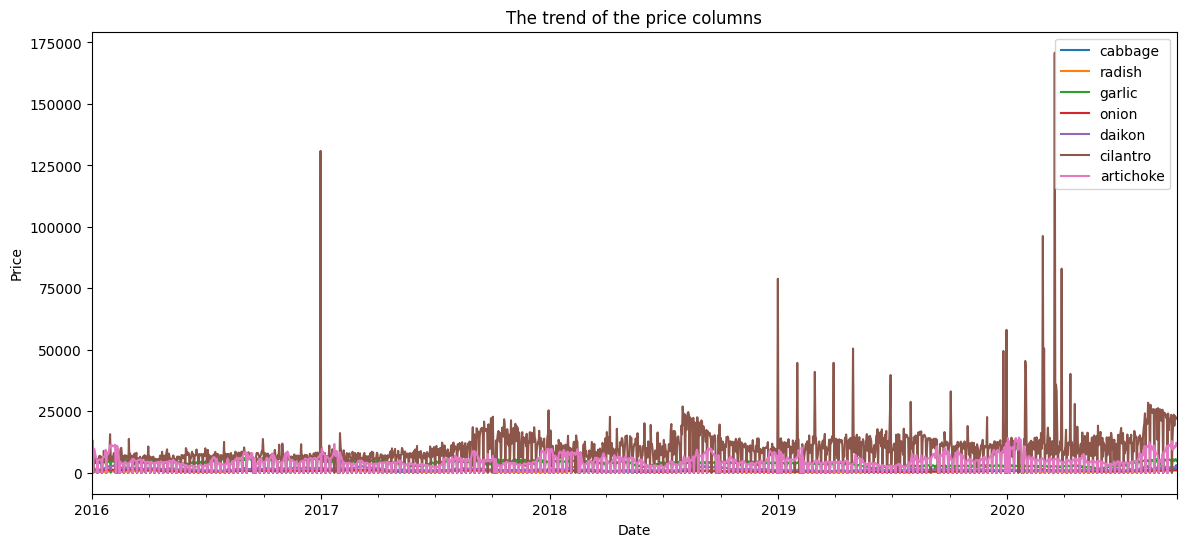

In [31]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

train_data.set_index("date").plot(figsize=(14,6))

plt.title("The trend of the price columns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [32]:
def calculate_rolling_mean(data, window=7):
    """
    변동성이 큰 가격을 갖는 품목에 대한 rolling mean 계산

    Args:
        data (pd.DataFrame): DataFrame containing price columns.
        window (int): window size for rolling mean (default is 7 days).

    Returns:
        pd.DataFrame: DataFrame with rolling mean applied to price columns.
    """
    # Exclude 'date' column from rolling mean calculation
    data_rolling_mean = data.drop(columns=['date']).rolling(window=window, min_periods=1).mean()

    # Merge 'date' column back to the DataFrame
    data_rolling_mean['date'] = data['date']

    return data_rolling_mean

# Calculate rolling mean on the training data
train_data_roll = calculate_rolling_mean(train_data)

In [33]:
train_data_roll.head()

cabbage  radish   garlic  onion  daikon     cilantro  artichoke  \
0    0.000000     0.0     0.00    0.0     0.0     0.000000       0.00   
1  164.500000   180.0  2737.50  640.5   852.0  5500.000000    6621.00   
2  109.666667   120.0  1825.00  427.0   568.0  3666.666667    4414.00   
3  201.750000   185.5  2671.25  629.0   855.0  3866.000000    5791.25   
4  249.800000   232.8  3214.40  745.8  1027.0  3961.200000    6538.80   

        date  
0 2016-01-01  
1 2016-01-02  
2 2016-01-03  
3 2016-01-04  
4 2016-01-05

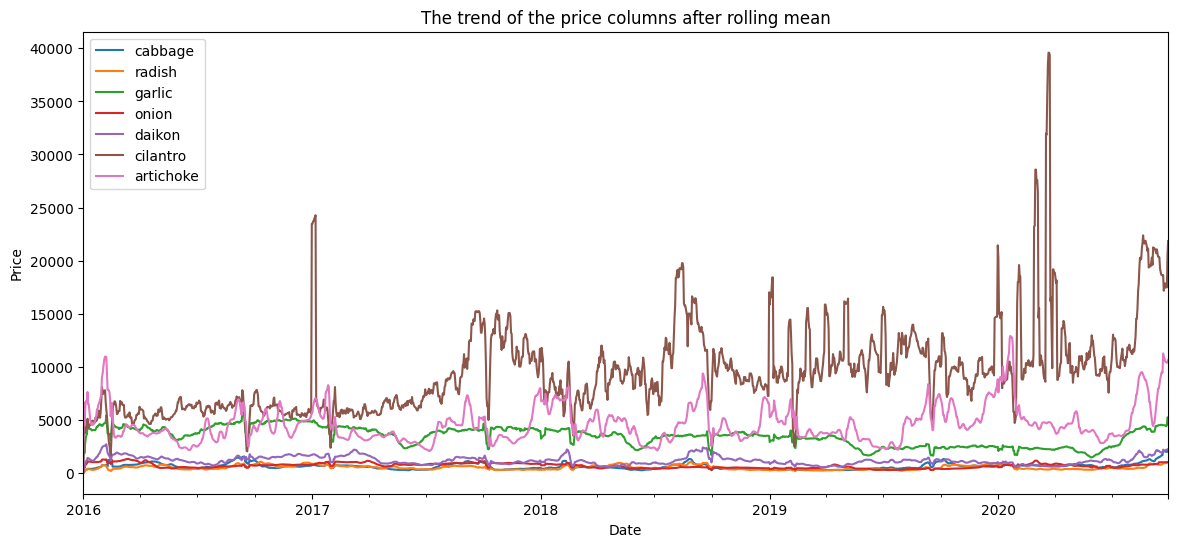

In [34]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

train_data_roll.set_index("date").plot(figsize=(14,6))

plt.title("The trend of the price columns after rolling mean")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [35]:
# 한국-영어
kor_to_eng = {
    'date': 'date',
    '배추': 'cabbage',
    '무': 'radish',
    '마늘': 'garlic',
    '양파': 'onion',
    '대파': 'daikon',
    '건고추': 'cilantro',
    '깻잎': 'artichoke'
}

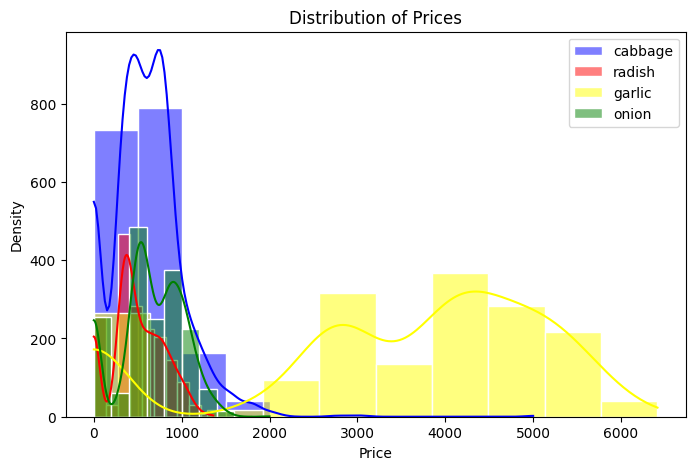

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure (optional)
plt.figure(figsize=(8, 5))

# Plot using seaborn histplot for each product
sns.histplot(train_data['cabbage'], bins=10, kde=True, label='cabbage', color='blue', edgecolor='white')
sns.histplot(train_data['radish'], bins=10, kde=True, label='radish', color='red', edgecolor='white')
sns.histplot(train_data['garlic'], bins=10, kde=True, label='garlic', color='yellow', edgecolor='white')
sns.histplot(train_data['onion'], bins=10, kde=True, label='onion', color='green', edgecolor='white')

plt.title('Distribution of Prices', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

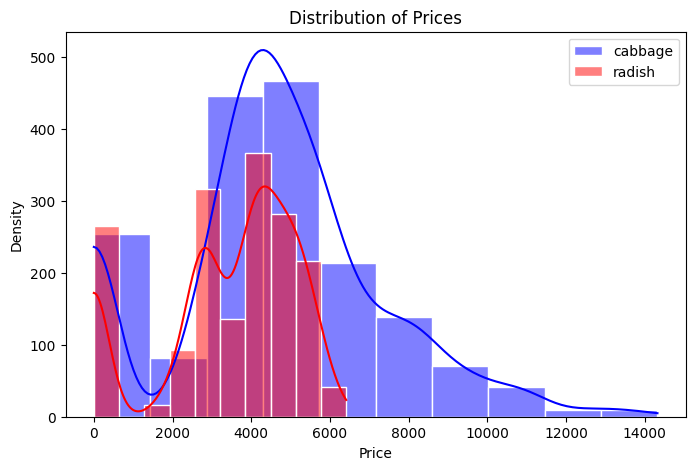

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure (optional)
plt.figure(figsize=(8, 5))

# Plot using seaborn histplot for each product
sns.histplot(train_data['artichoke'], bins=10, kde=True, label='cabbage', color='blue', edgecolor='white')
sns.histplot(train_data['garlic'], bins=10, kde=True, label='radish', color='red', edgecolor='white')

plt.title('Distribution of Prices', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend()
plt.show()

In [38]:
train_data.drop("date", axis=1).describe().astype(int)

cabbage  radish  garlic  onion  daikon  cilantro  artichoke
count     1733    1733    1733   1733    1733      1733       1733
mean       597     490    3433    652    1160      9537       4614
std        410     299    1751    366     645      8757       2733
min          0       0       0      0       0         0          0
25%        335     324    2687    467     853      6015       3387
50%        577     453    3953    638    1188      8607       4492
75%        805     717    4758    925    1551     12500       5942
max       5000    1360    6415   2000    3182    170836      14326

In [39]:
# 시계열 데이터이므로 날짜의 특성을 고려해 EDA 진행
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['day'] = train_data['date'].dt.day_of_week
train_data['month'] = train_data['date'].dt.month

# 요일별 평균 가격
price_by_day = train_data.groupby("day")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

# 월별 평균 가격
price_by_month = train_data.groupby("month")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

In [40]:
price_by_day

cabbage  radish   garlic   onion   daikon  cilantro  artichoke
day                                                                
0     683.44  561.35  3946.44  755.19  1365.35  10929.59    5291.88
1     672.60  568.67  4052.69  752.32  1360.32  10774.06    5313.30
2     686.67  561.73  4043.98  761.73  1330.97  10342.55    5284.68
3     671.24  575.26  3872.85  753.13  1336.74  11484.06    5259.10
4     668.19  563.08  4008.91  742.42  1311.27  10633.57    5291.32
5     699.12  558.24  4009.06  750.63  1321.08  12412.71    5324.81
6      99.55   47.78   107.33   55.50   102.17    203.03     541.68

Text(0, 0.5, 'Average Price')

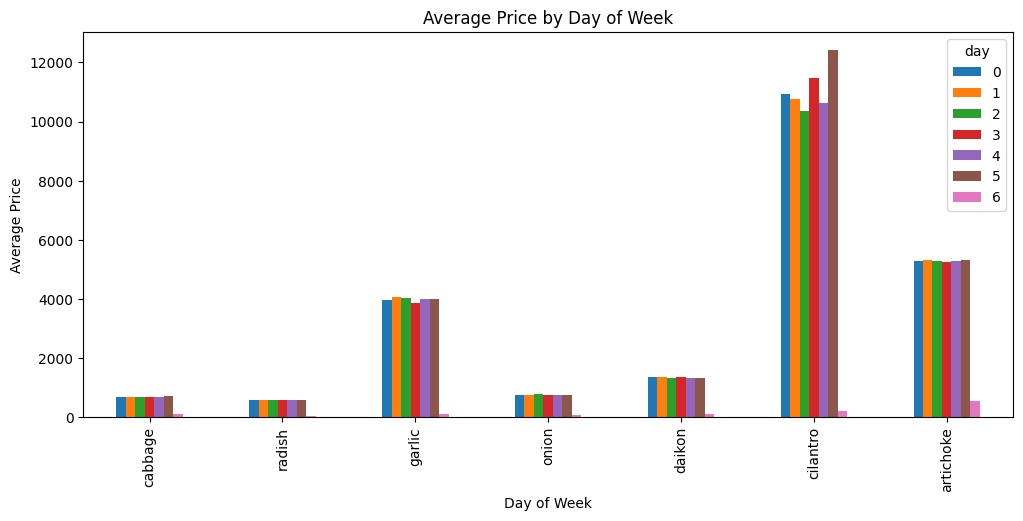

In [41]:
price_by_day.T.plot(kind='bar', figsize=(12, 5))
plt.title('Average Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

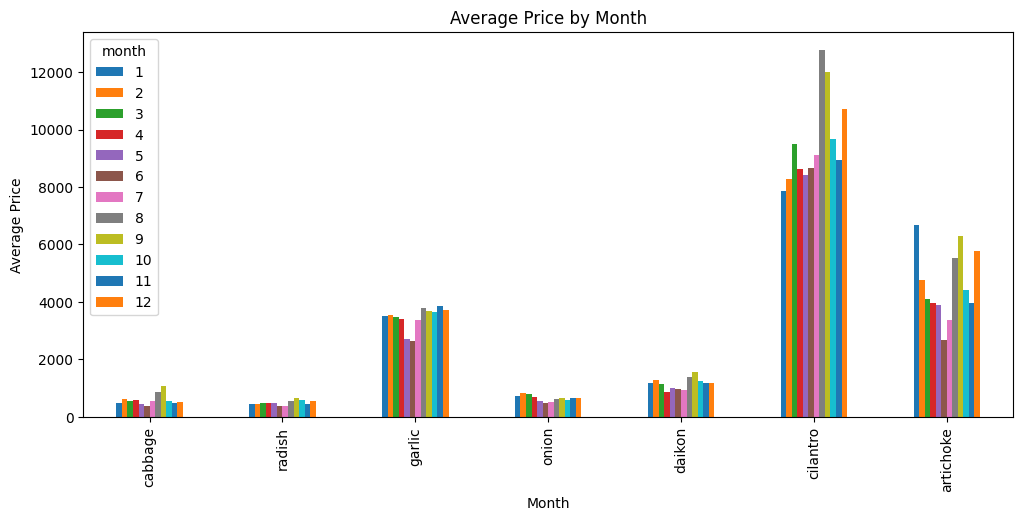

In [42]:
price_by_month.T.plot(kind='bar', figsize=(12, 5))
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

In [43]:
#품목별 가격의 상관관계
cor_matrix = test_data.corr()[1:].drop("date", axis=1)
cor_matrix.style.background_gradient(cmap='Blues')

- EDA Note
- 상관관계가 높은 품목의 Pair
    - 배추 & 무
    - 무 & 대파
    - 마늘 & 건고추
    - 양파 & 건고추
- 상관관계가 낮은 품목의 Pair
    - 건고추 & 배추
    - 건고추 & 무


## 베이스라인 모델 구축
- 간단한 시계열 예측모델과 ML 기반 모델을 구축.
- 기본적인 Feature Engineering, 전체적인 모델링 플로우에 대한 개념과 과정을 이해.
- Feature의 중요도와 예측 성능을 확인하는 방법을 이해.
- 모델링 과정은 다양한 피처 엔지니어링과 모델 알고리즘을 반복적으로 적용하고 실험함으로써 베스트 모델을 개발하는 과정을 반복.
- 첫 번째 단계로서 베이스라인(기준) 모델을 구축.

#### 예측방법론 개요
- 크게 시계열 알고리즘 과 ML 알고리즘으로 구분.
- **시계열 알고리즘**
  - 자기상관 \( y \) 값을 활용하여 과거 \( (t-1..t-n) \) 패턴을 학습하여 미래를 예측.
  - ML 모델처럼 Feature 정보를 활용하지 않으므로 간편하나, 정확도는 ML 모델에 비해 낮은 경향.
  - 대표적인 알고리즘으로 **Prophet**, **ARIMA**, **Exponential Smoothing** 등

- **M/L 알고리즘**
  - Feature Engineering을 통해 모델 학습 및 예측을 수행.
  - Target \( y \) 값을 잘 설명하는 변수를 선정하여 모델을 학습시키면 높은 정확도를 얻는 경향이 있음.
  - 단, Feature의 퀄리티에 따라 성능이 영향을 받을 수 있음.
  - 대표적인 알고리즘으로 **Linear Regression**, **Ridge**, **Lasso**, 그리고 Tree-based 모델들인 **Random Forest**, **LGBM**, **XGBOOST**, **MLP** 등이 있음.

 ### Prophet
  - 페이스북에서 개발한 시계열 기반 예측 알고리즘.
  - 시계열 예측모델 중에 정확도가 높은 편으로 유명하고 다양한 파라메터를 제공.
  - 참고: [https://hyperconnect.github.io/2020/03/09/prophet-package.html](https://hyperconnect.github.io/2020/03/09/prophet-package.html)


In [44]:
#!pip install prophet

In [45]:
import logging
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
logging.getLogger('prophet').setLevel(logging.WARNING)

In [46]:
# 훈련 데이터셋 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

#검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

Data loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
Data loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [47]:
# 예측 대상 df 생성
start_dt = '2020-09-29'
end_dt = '2020-11-04'
forecast_df = pd.DataFrame({'date': pd.date_range(start=start_dt, end=end_dt)})

# forecast_df

In [48]:
import holidays

# 한국 공휴일 데이터를 생성
kr_holidays = holidays.KR(years=[2016, 2017, 2018, 2019, 2020])
holidays_df = pd.DataFrame(list(kr_holidays.items()), columns=['ds', 'holiday'])
holidays_df['lower_window'] = 0
holidays_df['upper_window'] = 1

# Display holidays_df
holidays_df

ds                                  holiday  lower_window  \
0   2016-01-01                           New Year's Day             0   
1   2016-02-08                          Korean New Year             0   
2   2016-02-07        The day preceding Korean New Year             0   
3   2016-02-09        The second day of Korean New Year             0   
4   2016-03-01                Independence Movement Day             0   
..         ...                                      ...           ...   
83  2020-10-02                The second day of Chuseok             0   
84  2020-12-25                            Christmas Day             0   
85  2020-04-15           National Assembly Election Day             0   
86  2020-01-27  Alternative holiday for Korean New Year             0   
87  2020-08-17                 Temporary Public Holiday             0   

    upper_window  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
83             1  
84             1  
85             1  
86             1  
87             1  

[88 rows x 4 columns]

In [49]:
# 예측 대상 df 생성
start_dt = '2020-09-29' # 예측시작일
end_dt = '2020-11-04' #예측마지막일

forecast_df = pd.DataFrame({'date': pd.date_range(start=start_dt, end=end_dt)})
forecast_df.head()

date
0 2020-09-29
1 2020-09-30
2 2020-10-01
3 2020-10-02
4 2020-10-03

In [50]:
# 품목별 반복하면서 예측후 저장
for col in train_data.columns:
    if col != 'date':
        train_prophet = train_data[['date', col]].rename(columns={'date': 'ds', col: 'y'})

        model_prophet = Prophet(holidays=holidays_df)
        model_prophet.fit(train_prophet)

        future_dates = pd.DataFrame(pd.date_range(start=start_dt, end=end_dt), columns=['ds'])
        forecast = model_prophet.predict(future_dates)
        forecast = forecast.round(2)
        forecast_df[col + '_pred'] = forecast['yhat']

DEBUG:cmdstanpy:input tempfile: /tmp/tmph09v23ja/ebndy17k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph09v23ja/g9xkfu5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79713', 'data', 'file=/tmp/tmph09v23ja/ebndy17k.json', 'init=/tmp/tmph09v23ja/g9xkfu5h.json', 'output', 'file=/tmp/tmph09v23ja/prophet_model9rr3474c/prophet_model-20250626064711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmph09v23ja/_7_tz602.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph09v23ja/033kh7ix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [51]:
forecast_df.head()

date  cabbage_pred  radish_pred  garlic_pred  onion_pred  daikon_pred  \
0 2020-09-29       1478.61       828.77      4709.09     1021.64      1953.22   
1 2020-09-30       1686.31      1007.64      5069.04     1235.51      2306.33   
2 2020-10-01        274.87        76.14       232.58      330.21        55.03   
3 2020-10-02        305.09        89.73       272.15      245.51       120.32   
4 2020-10-03       1553.56       918.77      5062.94     1018.12      2381.20   

   cilantro_pred  artichoke_pred  
0       17436.86         8106.61  
1        9096.02         7859.16  
2        4456.61          624.45  
3        3878.44         1043.18  
4       15509.56         4268.81

In [52]:
forecast_df.tail()

date  cabbage_pred  radish_pred  garlic_pred  onion_pred  \
32 2020-10-31        956.00       628.40      4807.08     1017.85   
33 2020-11-01        356.17       113.05       898.29      321.51   
34 2020-11-02        944.33       630.70      4781.40     1025.30   
35 2020-11-03        954.39       634.44      4896.90     1031.08   
36 2020-11-04        973.51       630.31      4924.14     1043.84   

    daikon_pred  cilantro_pred  artichoke_pred  
32      1563.27       18362.53         6693.37  
33       341.96        6129.51         1866.72  
34      1624.77       16709.85         6600.25  
35      1624.08       16574.10         6612.21  
36      1607.20       16098.79         6591.89

In [53]:
#실제값과 조인
test = test_data.merge(forecast_df, on=['date'], how='left')
test.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke  \
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0   
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0   
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0   

   cabbage_pred  radish_pred  garlic_pred  onion_pred  daikon_pred  \
0       1478.61       828.77      4709.09     1021.64      1953.22   
1       1686.31      1007.64      5069.04     1235.51      2306.33   
2        274.87        76.14       232.58      330.21        55.03   
3        305.09        89.73       272.15      245.51       120.32   
4       1553.56       918.77      5062.94     1018.12      2381.20   

   cilantro_pred  artichoke_pred  
0       17436.86         8106.61  
1        9096.02         7859.16  
2        4456.61          624.45  
3        3878.44         1043.18  
4       15509.56         4268.81

In [54]:
# 품목별로 실제, 예측값만 저장
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = test[['date', p, p+'_pred']]

In [55]:
print("Dataframe for galic:")
print(dfs['garlic'].head())

Dataframe for galic:
        date  garlic  garlic_pred
0 2020-09-29  5404.0      4709.09
1 2020-09-30  5575.0      5069.04
2 2020-10-01     0.0       232.58
3 2020-10-02     0.0       272.15
4 2020-10-03     0.0      5062.94


In [56]:
print("Dataframe for cabbage:")
print(dfs['cabbage'].head())

Dataframe for cabbage:
        date  cabbage  cabbage_pred
0 2020-09-29   1787.0       1478.61
1 2020-09-30   1551.0       1686.31
2 2020-10-01      0.0        274.87
3 2020-10-02      0.0        305.09
4 2020-10-03      0.0       1553.56


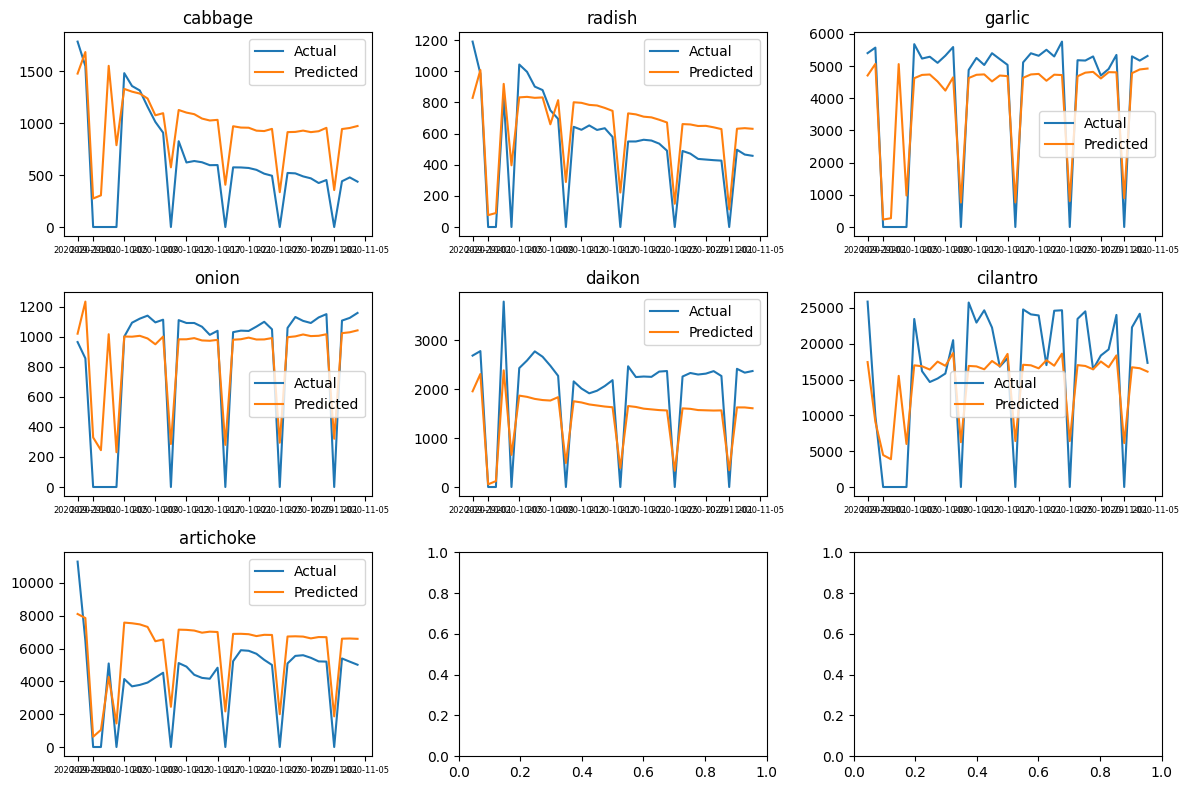

In [57]:
# 품목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

# 품목 목록
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for i, (prd, ax) in enumerate(zip(products, axes)):
    df = dfs[prd]
    ax.plot(df['date'], df[prd], label='Actual')
    ax.plot(df['date'], df[prd + '_pred'], label='Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis='x', labelsize=6)

plt.tight_layout()
plt.show()

- Note
- 성능지표 선정: MdAPE (Median Absoulte Percentage Error)
- 실제값 대비 절대값 오차의 비율로 오차율을 구한후 1에서 빼서 정확도를 표현
- 0~1 사이의 값을 가지므로 스케일에 영향받지 않아 비교가 용이
- 단 실제값이 너무 작을 경우(분모) 수치 변동성이 큼

In [58]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = test[['date', p, p + '_pred']]
    dfs[p]['gap'] = dfs[p][p] - dfs[p][p + '_pred']
    dfs[p]['abs_gap'] = abs(dfs[p][p] - dfs[p][p + '_pred'])
    dfs[p]['ape'] = dfs[p]['abs_gap'] / dfs[p][p]
    dfs[p]['ape_median'] = 1 - dfs[p]['ape'].median()

In [59]:
for p in prd:
    print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.22713826366559486
radish: APE Median = 0.6964453781512605
garlic: APE Median = 0.8940248027057497
onion: APE Median = 0.8998620689655171
daikon: APE Median = 0.6855865921787709
cilantro: APE Median = 0.7249942462600691
artichoke: APE Median = 0.6019741985926506


In [60]:
# postprocessing
# 비즈니스 로직이나 패턴 등을 이해하여 임의의 예측 값으로 변형: 일요일은 0으로 예측값을 일괄 적용
price_by_day

cabbage  radish   garlic   onion   daikon  cilantro  artichoke
day                                                                
0     683.44  561.35  3946.44  755.19  1365.35  10929.59    5291.88
1     672.60  568.67  4052.69  752.32  1360.32  10774.06    5313.30
2     686.67  561.73  4043.98  761.73  1330.97  10342.55    5284.68
3     671.24  575.26  3872.85  753.13  1336.74  11484.06    5259.10
4     668.19  563.08  4008.91  742.42  1311.27  10633.57    5291.32
5     699.12  558.24  4009.06  750.63  1321.08  12412.71    5324.81
6      99.55   47.78   107.33   55.50   102.17    203.03     541.68

In [61]:
test.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke  \
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0   
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0   
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0   

   cabbage_pred  radish_pred  garlic_pred  onion_pred  daikon_pred  \
0       1478.61       828.77      4709.09     1021.64      1953.22   
1       1686.31      1007.64      5069.04     1235.51      2306.33   
2        274.87        76.14       232.58      330.21        55.03   
3        305.09        89.73       272.15      245.51       120.32   
4       1553.56       918.77      5062.94     1018.12      2381.20   

   cilantro_pred  artichoke_pred  
0       17436.86         8106.61  
1        9096.02         7859.16  
2        4456.61          624.45  
3        3878.44         1043.18  
4       15509.56         4268.81

In [62]:
test_post = test.copy()

# 요일
test_post['day'] = test_post['date'].dt.day_of_week

# 공휴일 지정
holidays = ['2020-10-01', '2020-10-03']
test_post['holiday'] = test_post['date'].isin(holidays).astype(int)

# 일요일이거나 공휴일인 경우 1 아니면 0
test_post['is_flag'] = np.where((test_post['day'] == 6) | (test_post['holiday'] == 1), 1, 0)

In [63]:
# 공휴일이거나 일요일인 경우 예측값을 0으로 치환
# 휴일은 거래 자체가 closed 가능성 높음. 결국 사람이 거래를 하는데 휴일에는 휴식 필요.
for p in prd:
    test_post[p + '_pred'] = np.where(test_post['is_flag'] == 0, test_post[p + '_pred'], 0)

test_post.head(7)

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
0 2020-09-29   1787.0  1190.0  5404.0   966.0  2682.0   25873.0    11298.0   
1 2020-09-30   1551.0   984.0  5575.0   857.0  2774.0    9929.0     6476.0   
2 2020-10-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
3 2020-10-02      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
4 2020-10-03      0.0   835.0     0.0     0.0  3784.0       0.0     5091.0   
5 2020-10-04      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
6 2020-10-05   1483.0  1043.0  5683.0  1002.0  2427.0   23450.0     4142.0   

   cabbage_pred  radish_pred  garlic_pred  onion_pred  daikon_pred  \
0       1478.61       828.77      4709.09     1021.64      1953.22   
1       1686.31      1007.64      5069.04     1235.51      2306.33   
2          0.00         0.00         0.00        0.00         0.00   
3        305.09        89.73       272.15      245.51       120.32   
4          0.00         0.00         0.00        0.00         0.00   
5          0.00         0.00         0.00        0.00         0.00   
6       1331.09       832.01      4624.78     1002.93      1865.03   

   cilantro_pred  artichoke_pred  day  holiday  is_flag  
0       17436.86         8106.61    1        0        0  
1        9096.02         7859.16    2        0        0  
2           0.00            0.00    3        1        1  
3        3878.44         1043.18    4        0        0  
4           0.00            0.00    5        1        1  
5           0.00            0.00    6        0        1  
6       16980.70         7581.39    0        0        0

In [64]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

dfs_post = {}
for p in prd:
    dfs_post[p] = test_post[['date', p, p + '_pred']]

print("Dataframe for galic:")
print(dfs_post['garlic'].head(10))

Dataframe for galic:
        date  garlic  garlic_pred
0 2020-09-29  5404.0      4709.09
1 2020-09-30  5575.0      5069.04
2 2020-10-01     0.0         0.00
3 2020-10-02     0.0       272.15
4 2020-10-03     0.0         0.00
5 2020-10-04     0.0         0.00
6 2020-10-05  5683.0      4624.78
7 2020-10-06  5235.0      4726.63
8 2020-10-07  5292.0      4740.11
9 2020-10-08  5102.0      4523.04


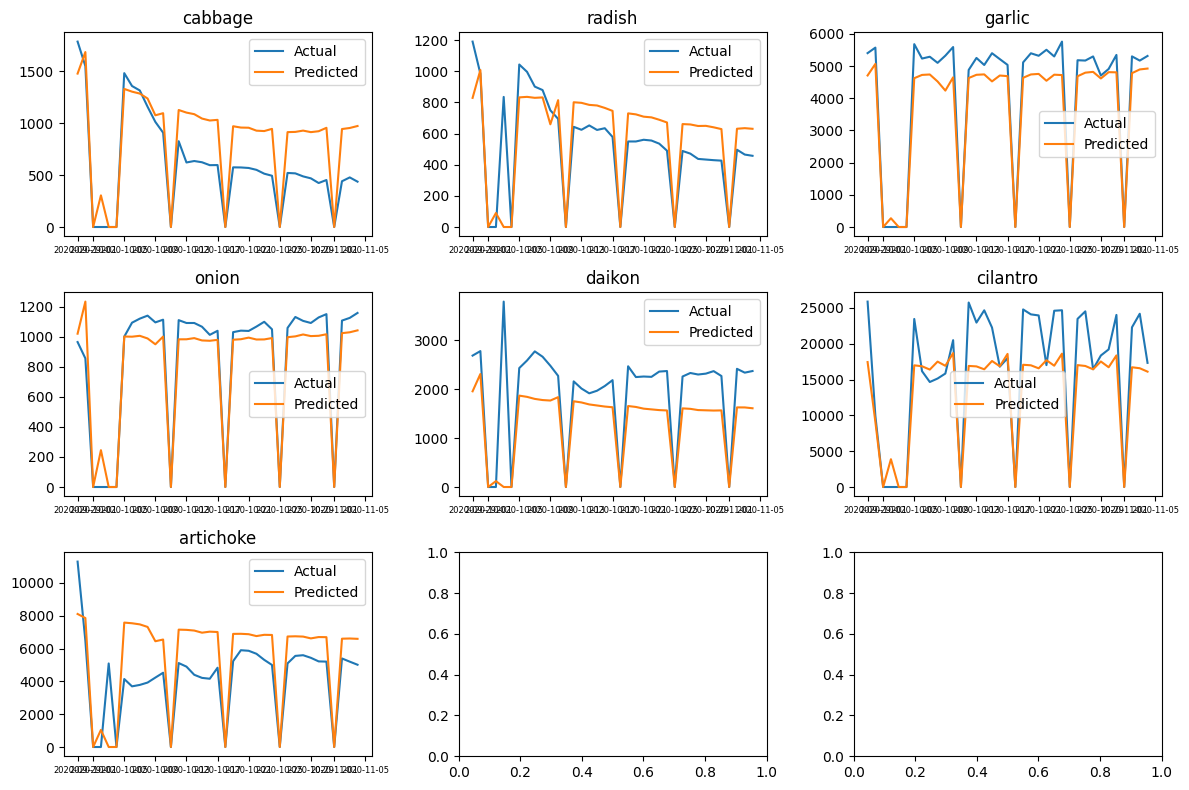

In [65]:
# 품목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()

# 품목 목록
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for i, (prd, ax) in enumerate(zip(products, axes)):
    df = dfs_post[prd]
    ax.plot(df['date'], df[prd], label='Actual')
    ax.plot(df['date'], df[prd + '_pred'], label='Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis='x', labelsize=6)

plt.tight_layout()
plt.show()

In [66]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for p in prd:
    dfs_post[p]['gap'] = (dfs_post[p][p] - dfs_post[p][p + '_pred'])
    dfs_post[p]['abs_gap'] = abs(dfs_post[p][p] - dfs_post[p][p + '_pred'])
    dfs_post[p]['ape'] = dfs_post[p]['abs_gap'] / dfs_post[p][p]
    dfs_post[p]['ape_median'] = 1 - (dfs_post[p]['ape'].median())

In [67]:
# with proprocessing
for p in prd:
    print(f"{p}: APE Median = {dfs_post[p]['ape_median'][0]}")

cabbage: APE Median = 0.2837211915917437
radish: APE Median = 0.7132149532710281
garlic: APE Median = 0.9010030083308562
onion: APE Median = 0.9146447975988918
daikon: APE Median = 0.7047686832740213
cilantro: APE Median = 0.7596517062278811
artichoke: APE Median = 0.6787009419152277


In [68]:
# without post-processing
for p in prd:
    print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.22713826366559486
radish: APE Median = 0.6964453781512605
garlic: APE Median = 0.8940248027057497
onion: APE Median = 0.8998620689655171
daikon: APE Median = 0.6855865921787709
cilantro: APE Median = 0.7249942462600691
artichoke: APE Median = 0.6019741985926506


- Note
- Prophet 알고리즘을 이용한 성능 확인 완료
- Post-processing은 효과가 있으므로 필수적으로 진행 필요

### Feature Engineering for ML
- 모델링의 성능을 좌우하는 가장 중요한 요인이 Feature 임.
- Feature 즉 모델의 Input을 어떻게 변형하여 넣어주는지에 따라 모델 성능에 영향을 줌.
- 시계열 데이터셋에서 기본적인 Feature는 날짜, 시점과 관련된 feature 임.
- 예를 들어, 2024-01-01 이라는 날짜가 있을때 이를 요일, 월, 연, 분기, 반기, 주말/주중으로 변환하여 feature 로 활용.
- 위와 같은 시점 관련 정보는 target value (여기에서는 품목별 가격)에 대한 많은 정보를 담고 있음.


In [69]:
# 훈련 데이터셋 생성
train_data = load_data_set(train_file_path, target_prd, kor_to_eng)

#검증 데이터셋 생성
test_data = load_data_set(test_file_path, target_prd, kor_to_eng)

Data loaded successfully
        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
Data loaded successfully
        date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke
0 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0
1 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0
2 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0
3 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0
4 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0


In [70]:
# 편의를 위해 학습 + 테스트셋 합치기
data = pd.concat([train_data, test_data]).reset_index(drop=True)

print(data.head())
print(data.tail())

        date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
           date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
1765 2020-10-31    453.0   426.0  5348.0  1152.0  2265.0   24013.0     5204.0
1766 2020-11-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1767 2020-11-02    441.0   496.0  5303.0  1109.0  2412.0   22287.0     5395.0
1768 2020-11-03    478.0   465.0  5172.0  1127.0  2334.0   24178.0     5201.0
1769 2020-11-04    437.0   457.0  5316.0  1160.0  2367.0   17324.0     5013.0


In [71]:
import holidays

def add_date_features(data):
    """
    dataset 에 날짜 관련된 피처를 생성
    args:
         dataset
    return:
         features dataset
    """
    # 날짜 기반 파생변수 생성
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['day_of_week'] = data['date'].dt.dayofweek
    data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

    # 공휴일 변수
    kr_holidays = holidays.KR(years=data['year'].unique())
    data['is_holiday'] = data['date'].isin(kr_holidays).astype(int)

    return data

In [72]:
data = add_date_features(data)

In [73]:
data

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
0    2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
1    2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0   
2    2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
3    2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0   
4    2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0   
...         ...      ...     ...     ...     ...     ...       ...        ...   
1765 2020-10-31    453.0   426.0  5348.0  1152.0  2265.0   24013.0     5204.0   
1766 2020-11-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
1767 2020-11-02    441.0   496.0  5303.0  1109.0  2412.0   22287.0     5395.0   
1768 2020-11-03    478.0   465.0  5172.0  1127.0  2334.0   24178.0     5201.0   
1769 2020-11-04    437.0   457.0  5316.0  1160.0  2367.0   17324.0     5013.0   

      year  month  day  day_of_week  is_weekend  is_holiday  
0     2016      1    1            4           0           1  
1     2016      1    2            5           1           0  
2     2016      1    3            6           1           0  
3     2016      1    4            0           0           0  
4     2016      1    5            1           0           0  
...    ...    ...  ...          ...         ...         ...  
1765  2020     10   31            5           1           0  
1766  2020     11    1            6           1           0  
1767  2020     11    2            0           0           0  
1768  2020     11    3            1           0           0  
1769  2020     11    4            2           0           0  

[1770 rows x 14 columns]

In [74]:
def add_lagging_features(data, window=7):
    """
    예측값의 과거 t-1, .. t-n 까지의 데이터를 추가
    Args:
        data (pd.DataFrame): 제품 가격이 포함된 입력 데이터셋.
        window (int, optional): 이전 시간 스텝을 이동할 개수. 기본값은 7.

    Returns:
        pd.DataFrame: 추가된 지연(lag) 피처를 포함한 새로운 데이터셋.
    """
    data = data.copy()
    products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

    for product in products:
        data[f'{product}_lag_{window}'] = data[product].shift(window)

    return data

In [75]:
data = add_lagging_features(data, window=7)
data = add_lagging_features(data, window=14)

In [76]:
data.head()

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0   
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0   
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0   

   year  month  ...  daikon_lag_7  cilantro_lag_7  artichoke_lag_7  \
0  2016      1  ...           NaN             NaN              NaN   
1  2016      1  ...           NaN             NaN              NaN   
2  2016      1  ...           NaN             NaN              NaN   
3  2016      1  ...           NaN             NaN              NaN   
4  2016      1  ...           NaN             NaN              NaN   

   cabbage_lag_14  radish_lag_14  garlic_lag_14  onion_lag_14  daikon_lag_14  \
0             NaN            NaN            NaN           NaN            NaN   
1             NaN            NaN            NaN           NaN            NaN   
2             NaN            NaN            NaN           NaN            NaN   
3             NaN            NaN            NaN           NaN            NaN   
4             NaN            NaN            NaN           NaN            NaN   

   cilantro_lag_14  artichoke_lag_14  
0              NaN               NaN  
1              NaN               NaN  
2              NaN               NaN  
3              NaN               NaN  
4              NaN               NaN  

[5 rows x 28 columns]

In [77]:
def add_rolling_mean(data, window=7):
    """
    변동성이 큰 가격을 갖는 품목에 대한 rolling mean 계산
    Args:
        data (pd.DataFrame): 제품 가격이 포함된 입력 데이터셋.
        window (int, optional): 롤링 윈도우 크기. 기본값은 7.

    Returns:
        pd.DataFrame: rolling mean과 rolling standard deviation을 포함한 새로운 데이터셋.
    """
    products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

    for product in products:
        data[f'{product}_rolling_mean'] = data[product].rolling(window=window).mean()
        data[f'{product}_rolling_std'] = data[product].rolling(window=window).std()

    return data

In [78]:
data = add_rolling_mean(data)

In [79]:
data.head()

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0   
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0   
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0   

   year  month  ...  garlic_rolling_mean  garlic_rolling_std  \
0  2016      1  ...                  NaN                 NaN   
1  2016      1  ...                  NaN                 NaN   
2  2016      1  ...                  NaN                 NaN   
3  2016      1  ...                  NaN                 NaN   
4  2016      1  ...                  NaN                 NaN   

   onion_rolling_mean  onion_rolling_std  daikon_rolling_mean  \
0                 NaN                NaN                  NaN   
1                 NaN                NaN                  NaN   
2                 NaN                NaN                  NaN   
3                 NaN                NaN                  NaN   
4                 NaN                NaN                  NaN   

   daikon_rolling_std  cilantro_rolling_mean  cilantro_rolling_std  \
0                 NaN                    NaN                   NaN   
1                 NaN                    NaN                   NaN   
2                 NaN                    NaN                   NaN   
3                 NaN                    NaN                   NaN   
4                 NaN                    NaN                   NaN   

   artichoke_rolling_mean  artichoke_rolling_std  
0                     NaN                    NaN  
1                     NaN                    NaN  
2                     NaN                    NaN  
3                     NaN                    NaN  
4                     NaN                    NaN  

[5 rows x 42 columns]

In [80]:
def split_data(data, std_date="2020-09-29"):
    """
    특정 날짜 기준으로 train, test dataset 나누기
    Args:
        data (pd.DataFrame): 입력 데이터셋.
        std_date (str, optional): 기준 날짜. 기본값은 '2020-09-29'.

    Returns:
        tuple: 훈련용(train) 데이터셋과 테스트용(test) 데이터셋.
    """
    data = data.dropna()
    train_data = data.query("date < @std_date")
    test_data = data.query("date >= @std_date")

    print("Train set shape:", train_data.shape)
    print("Test set shape:", test_data.shape)
    return train_data, test_data

In [81]:
train_data, test_data = split_data(data)

Train set shape: (1719, 42)
Test set shape: (37, 42)


In [82]:
train_data.tail()

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
1728 2020-09-24   1839.0   990.0  4775.0   990.0  2380.0   19101.0    10028.0   
1729 2020-09-25   1789.0  1011.0  5039.0   955.0  2239.0   23095.0    10921.0   
1730 2020-09-26   1760.0  1075.0  5565.0   961.0  2126.0   22510.0    10607.0   
1731 2020-09-27   3066.0  1139.0  5227.0  1056.0  1866.0   22333.0    12195.0   
1732 2020-09-28   1867.0  1147.0  4757.0   964.0  2614.0   22022.0    11164.0   

      year  month  ...  garlic_rolling_mean  garlic_rolling_std  \
1728  2020      9  ...          4421.142857         1963.211945   
1729  2020      9  ...          4392.285714         1950.596466   
1730  2020      9  ...          4472.571429         1991.068629   
1731  2020      9  ...          5219.285714          273.348809   
1732  2020      9  ...          5168.714286          324.653002   

      onion_rolling_mean  onion_rolling_std  daikon_rolling_mean  \
1728          994.857143          34.387152          2140.857143   
1729          994.000000          35.430684          2166.571429   
1730          991.857143          37.114366          2178.000000   
1731          990.142857          33.067752          2127.714286   
1732          986.857143          34.541900          2211.428571   

      daikon_rolling_std  cilantro_rolling_mean  cilantro_rolling_std  \
1728          133.913440           17450.285714           8401.309733   
1729          132.853123           17623.000000           8519.296313   
1730          123.891081           17472.571429           8405.466730   
1731          168.393106           20663.000000           3439.777076   
1732          240.697498           21842.428571           1609.001125   

      artichoke_rolling_mean  artichoke_rolling_std  
1728            10425.857143            1213.752779  
1729            10401.428571            1199.751204  
1730            10461.571429            1197.702503  
1731            10366.142857             981.590279  
1732            10630.714286             895.962186  

[5 rows x 42 columns]

In [83]:
test_data.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke  \
1733 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0   
1734 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0   
1735 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1736 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1737 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0   

      year  month  ...  garlic_rolling_mean  garlic_rolling_std  \
1733  2020      9  ...          5155.571429          310.760281   
1734  2020      9  ...          5191.714286          346.051400   
1735  2020     10  ...          4509.571429         2010.038296   
1736  2020     10  ...          3789.714286         2603.526564   
1737  2020     10  ...          2994.714286         2812.360320   

      onion_rolling_mean  onion_rolling_std  daikon_rolling_mean  \
1733          982.142857          34.858899          2303.285714   
1734          964.142857          58.712374          2383.000000   
1735          822.714286         367.326247          2043.000000   
1736          686.285714         472.341936          1723.142857   
1737          549.000000         516.757519          1960.000000   

      daikon_rolling_std  cilantro_rolling_mean  cilantro_rolling_std  \
1733          282.917370           22649.000000           2025.475335   
1734          329.070914           20694.714286           5143.887528   
1735          959.097319           17966.000000           9419.550379   
1736         1220.551710           14666.714286          11200.008091   
1737         1450.896734           11451.000000          11788.771041   

      artichoke_rolling_mean  artichoke_rolling_std  
1733            10881.428571             778.741904  
1734            10384.142857            1846.655303  
1735             8951.571429            4355.046378  
1736             7391.428571            5369.857784  
1737             6603.428571            5222.031848  

[5 rows x 42 columns]

### ML 모델 구축 및 성능 비교

In [84]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [85]:
train_data.columns

Index(['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro',
       'artichoke', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
       'is_holiday', 'cabbage_lag_7', 'radish_lag_7', 'garlic_lag_7',
       'onion_lag_7', 'daikon_lag_7', 'cilantro_lag_7', 'artichoke_lag_7',
       'cabbage_lag_14', 'radish_lag_14', 'garlic_lag_14', 'onion_lag_14',
       'daikon_lag_14', 'cilantro_lag_14', 'artichoke_lag_14',
       'cabbage_rolling_mean', 'cabbage_rolling_std', 'radish_rolling_mean',
       'radish_rolling_std', 'garlic_rolling_mean', 'garlic_rolling_std',
       'onion_rolling_mean', 'onion_rolling_std', 'daikon_rolling_mean',
       'daikon_rolling_std', 'cilantro_rolling_mean', 'cilantro_rolling_std',
       'artichoke_rolling_mean', 'artichoke_rolling_std'],
      dtype='object')

In [86]:
# 예측 대상 품목 리스트
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

# 피처 정의
features = ['year', 'month', 'day', 'day_of_week', 'is_weekend', 'is_holiday'] + \
           [f'{product}_lag_7' for product in products] + \
           [f'{product}_lag_14' for product in products] + \
           [f'{product}_rolling_mean' for product in products] + \
           [f'{product}_rolling_std' for product in products]

# 타겟 정의
targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [87]:
# 모델 선언: 계속해서 다른 모델도 추가 가능
models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor(),
    'MLP': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}

def train_models(train_data, test_data, targets, features, models):
    """
    학습 데이터셋을 받아서 모델별로 반복하여 학습 진행하고 예측값을 반환하는 함수.
    Args:
        train_data (pd.DataFrame): 학습 데이터셋.
        test_data (pd.DataFrame): 테스트 데이터셋.
        targets (list): 예측하려는 품목 리스트.
        features (list): 학습에 사용할 피처 리스트.
        models (dict): 사용할 모델들의 딕셔너리.

    Returns:
        dict: 각 모델에 대해 예측된 값을 포함한 결과 딕셔너리.
    """
    predictions = {model_name: {} for model_name in models}
    for model_name, model in models.items():
        for target in targets:
            model.fit(train_data[features], train_data[target])
            predictions[model_name][target] = model.predict(test_data[features])
    return predictions

In [88]:
predictions = train_models(train_data, test_data, targets, features, models)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 492.411867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

In [89]:
predictions

{'Ridge': {'cabbage': array([2325.38158538, 2151.05164051, 1778.77710296, 1500.6520821 ,
         1217.60625779,  864.62684014,  987.94693262,  919.54367958,
          757.25002659,  237.41574035,  285.81442274,  931.52858901,
          612.94599123, 1199.99669111, 1160.45230724, 1065.12614832,
          726.46829958,  597.5479715 ,  365.64602412,   16.03703068,
          787.87268489,  677.47971049,  680.08507546,  637.83471589,
          633.83933319,  629.66211594,  -46.1711671 ,  636.28916424,
          630.8813805 ,  611.07546373,  607.20931341,  586.72219841,
          513.72268928,  -71.95563132,  579.20891928,  602.49861479,
          550.39729897]),
  'radish': array([1293.54879044, 1148.61851687,  942.76892162,  816.23411061,
          742.14176535,  686.00701801,  815.68004653,  797.85670549,
          710.34755419,  324.96111694,  278.50307639,  657.7299009 ,
          425.83225779,  946.71325549,  906.02636508,  844.50046274,
          532.4334373 ,  475.21153134,  440.403

In [90]:
predictions['LGBM']['onion']

array([ 922.65625067,  928.12943346,  660.48043965,  319.57355106,
        188.6157825 ,  339.12872439,  818.37232228,  926.83773449,
        963.75119256,  979.39721962,  817.96252382,  882.36869629,
        -46.64847414,  986.47193495, 1015.96775673, 1078.6758735 ,
       1076.40336887, 1020.40147358,  985.64498685,   41.4053009 ,
        975.5440814 , 1025.99864481,  988.57595541,  995.92394404,
       1024.26654128, 1000.95528986,   10.7452048 , 1004.16684765,
       1008.03082367, 1006.62684908, 1031.08044021, 1068.39688231,
       1096.68229573,   30.86361132, 1100.08155403, 1064.46729874,
       1095.86699604])

In [91]:
predictions['MLP']['cabbage']

array([1770.51701274, 2128.02036742, 1964.55154415, 1281.14234295,
        872.66628569,  892.26537065,  728.71793543,  562.78528922,
        374.45988605,  722.55387912,  861.29520504, 1115.44030052,
        991.68185144, 1071.72168706,  913.94985833, 1007.30871794,
        869.82769247,  803.26742345,  524.64593226,  113.42706786,
        762.11708016,  674.9407884 ,  621.00123116,  625.63445809,
        638.94411638,  686.67655768,   92.29213789,  644.56871483,
        616.01118295,  592.17724224,  564.76339836,  484.43577566,
        484.35509451,   90.11201445,  561.63096364,  514.05752834,
        533.61520438])

In [92]:
predictions['XGBoost']['cabbage']

array([ 2.1727041e+03,  1.5227760e+03,  1.7726680e+03,  1.9123832e+03,
        1.6435557e+03,  5.8832520e+02,  9.4400189e+02,  9.3169287e+02,
        9.0751758e+02,  9.2123248e+02,  9.6437390e+02,  7.9531982e+02,
        5.9325382e+01,  1.0504916e+03,  1.0316085e+03,  8.8345563e+02,
        7.8955029e+02,  7.2596436e+02,  6.0510272e+02, -2.7989259e+00,
        3.8578040e+02,  5.8192603e+02,  5.5484406e+02,  6.2720770e+02,
        5.0071356e+02,  5.4602686e+02, -1.4619687e+00,  5.5582465e+02,
        5.1896954e+02,  4.7264169e+02,  4.7082925e+02,  4.2171945e+02,
        4.0791989e+02, -1.7709608e+01,  4.2728339e+02,  4.4647339e+02,
        4.2990155e+02], dtype=float32)

In [93]:
def create_predictions_df(test_data, predictions, targets):
    """
    테스트셋에 대한 예측값을 데이터프레임으로 생성하는 함수.

    Args:
        test_data (pd.DataFrame): 테스트 데이터셋.
        predictions (dict): 각 모델에서 예측된 값을 포함한 딕셔너리.
        targets (list): 예측하려는 품목 리스트.

    Returns:
        pd.DataFrame: 테스트 데이터셋에 예측값을 추가한 새로운 데이터프레임.
    """
    # 예측값을 데이터프레임으로 변환
    test_data_predictions = test_data.copy()

    for model_name, model_preds in predictions.items():
        for target in targets:
            # 예측값을 'target' 별로 모델명과 함께 컬럼 추가
            test_data_predictions[f'{target}_pred_{model_name}'] = model_preds[target]
    return test_data_predictions

In [94]:
test_data_predictions = create_predictions_df(test_data, predictions, targets)

In [95]:
test_data_predictions.tail()

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
1765 2020-10-31    453.0   426.0  5348.0  1152.0  2265.0   24013.0     5204.0   
1766 2020-11-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
1767 2020-11-02    441.0   496.0  5303.0  1109.0  2412.0   22287.0     5395.0   
1768 2020-11-03    478.0   465.0  5172.0  1127.0  2334.0   24178.0     5201.0   
1769 2020-11-04    437.0   457.0  5316.0  1160.0  2367.0   17324.0     5013.0   

      year  month  ...  daikon_pred_XGBoost  cilantro_pred_XGBoost  \
1765  2020     10  ...          1936.800049           26469.830078   
1766  2020     11  ...            -8.553579            -828.160706   
1767  2020     11  ...          2208.924072           21913.974609   
1768  2020     11  ...          2201.283203           19229.408203   
1769  2020     11  ...          2154.225342           20106.990234   

      artichoke_pred_XGBoost  cabbage_pred_MLP  radish_pred_MLP  \
1765             5664.440430        484.355095       435.195207   
1766              137.593307         90.112014        -1.579833   
1767             5241.469238        561.630964       436.259999   
1768             5105.583008        514.057528       462.029020   
1769             5131.424316        533.615204       346.189485   

      garlic_pred_MLP  onion_pred_MLP  daikon_pred_MLP  cilantro_pred_MLP  \
1765      5329.834548      940.852312      2215.948790       20278.781781   
1766      -162.153382      -13.646599       204.740471         809.346287   
1767      5184.043955      829.564782      2501.335156       20020.945326   
1768      5278.168120      907.302863      2471.391596       19768.423479   
1769      5172.186474      832.066931      2367.768833       20793.042235   

      artichoke_pred_MLP  
1765         5007.614409  
1766          -46.858457  
1767         5436.072001  
1768         5298.993340  
1769         5369.133556  

[5 rows x 77 columns]

In [96]:
def evaluate_predictions(test_data_predictions, targets):
    """
    테스트셋에 대한 예측값을 평가하여 MdAPE를 계산하는 함수.

    Args:
        test_data_predictions (pd.DataFrame): 테스트셋과 예측값을 포함한 데이터프레임.
        targets (list): 예측하려는 품목 리스트.

    Returns:
        pd.DataFrame: 각 품목과 모델에 대한 MdAPE 값을 포함하는 데이터프레임.
    """
    MdAPES = {}
    for target in targets:
        for model_name in test_data_predictions.columns:
            if target + '_pred' in model_name:
                # APE 컬럼 생성
                APE_col = f'{target}_APE_{model_name.split("_")[2]}'
                test_data_predictions[APE_col] = np.abs(
                    (test_data_predictions[target] - test_data_predictions[model_name]) / test_data_predictions[target]
                )
                # MdAPE 계산
                MdAPE = test_data_predictions[APE_col].median()
                MdAPES[f'{target}_{model_name.split("_")[2]}'] = 1-round(MdAPE, 6)

    return pd.DataFrame(list(MdAPES.items()), columns=['product_model', 'MdAPE'])


In [97]:
metrics = evaluate_predictions(test_data_predictions, targets)
metrics[['product', 'model']] = metrics['product_model'].str.split('_', expand=True)

In [98]:
metrics.head()

product_model     MdAPE  product         model
0         cabbage_Ridge  0.666181  cabbage         Ridge
1  cabbage_RandomForest  0.868661  cabbage  RandomForest
2          cabbage_LGBM  0.802795  cabbage          LGBM
3       cabbage_XGBoost  0.794851  cabbage       XGBoost
4           cabbage_MLP  0.674579  cabbage           MLP

In [99]:
def plot_predictions(test_data_predictions, targets, models):

    num_rows = 3  # 그래프의 행 수
    num_cols = 3  # 그래프의 열 수
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
    axes = axes.flatten()  # 2D 배열을 1D로 변환하여 인덱스 사용을 용이하게 함

    for i, target in enumerate(targets):
        ax = axes[i]
        ax.plot(test_data_predictions['date'], test_data_predictions[target], label='Actual')
        for model_name in models.keys():
            ax.plot(test_data_predictions['date'], test_data_predictions[f'{target}_pred_{model_name}'],
                    label=f'Predicted_{model_name}')

        ax.set_title(target)
        ax.legend()
        ax.tick_params(axis='x', labelsize=6)

    plt.tight_layout()
    plt.show()

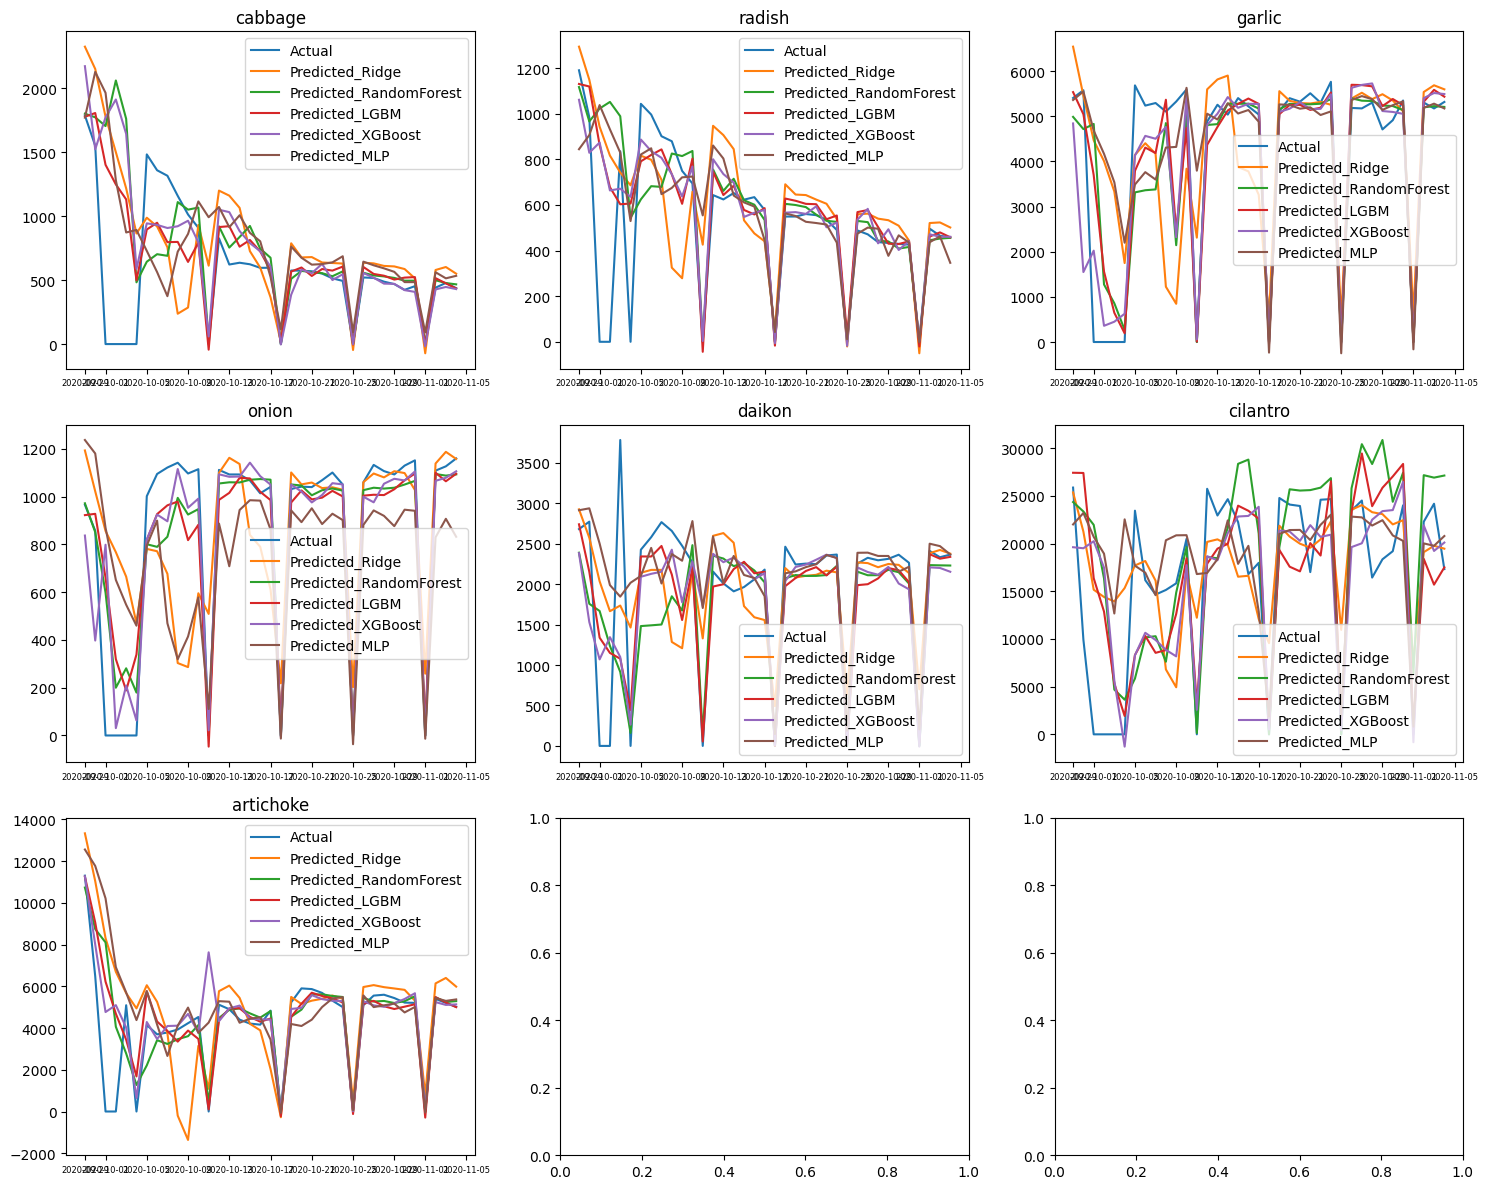

In [100]:
plot_predictions(test_data_predictions, targets, models)

In [101]:
def apply_post_processing(test_data, targets):
    """
    post-processing
    args:
        test_data,
        targets
    return:
        test_data
    """
    holidays = ['2020-10-01', '2020-10-03']
    test_data['day'] = test_data['date'].dt.dayofweek
    test_data['holiday'] = test_data['date'].isin(holidays).astype(int)
    test_data['is_flag'] = np.where((test_data['day'] == 6) | (test_data['holiday'] == 1), 1, 0)

    for target in targets:
        for model_name in test_data.columns:
            if target + '_pred_' in model_name:
                test_data[model_name] = np.where(test_data['is_flag'] == 0, test_data[model_name], 0)
    return test_data

In [102]:
test_data_predictions = create_predictions_df(test_data, predictions, targets)

In [103]:
test_data_predictions_post = apply_post_processing(test_data_predictions, targets)

In [104]:
test_data_predictions_post.tail(10)

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
1760 2020-10-26    521.0   488.0  5183.0  1060.0  2255.0   23463.0     5096.0   
1761 2020-10-27    517.0   471.0  5173.0  1133.0  2327.0   24514.0     5552.0   
1762 2020-10-28    488.0   437.0  5301.0  1107.0  2296.0   16436.0     5594.0   
1763 2020-10-29    469.0   433.0  4708.0  1093.0  2314.0   18353.0     5435.0   
1764 2020-10-30    424.0   429.0  4912.0  1130.0  2365.0   19203.0     5217.0   
1765 2020-10-31    453.0   426.0  5348.0  1152.0  2265.0   24013.0     5204.0   
1766 2020-11-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
1767 2020-11-02    441.0   496.0  5303.0  1109.0  2412.0   22287.0     5395.0   
1768 2020-11-03    478.0   465.0  5172.0  1127.0  2334.0   24178.0     5201.0   
1769 2020-11-04    437.0   457.0  5316.0  1160.0  2367.0   17324.0     5013.0   

      year  month  ...  artichoke_pred_XGBoost  cabbage_pred_MLP  \
1760  2020     10  ...             5286.774902        644.568715   
1761  2020     10  ...             5084.600586        616.011183   
1762  2020     10  ...             5017.376465        592.177242   
1763  2020     10  ...             5184.867676        564.763398   
1764  2020     10  ...             5389.917969        484.435776   
1765  2020     10  ...             5664.440430        484.355095   
1766  2020     11  ...                0.000000          0.000000   
1767  2020     11  ...             5241.469238        561.630964   
1768  2020     11  ...             5105.583008        514.057528   
1769  2020     11  ...             5131.424316        533.615204   

      radish_pred_MLP  garlic_pred_MLP  onion_pred_MLP  daikon_pred_MLP  \
1760       473.789388      5357.338829      881.588161      2388.893897   
1761       500.550181      5445.788298      942.419418      2390.555726   
1762       495.638077      5377.447638      919.592360      2349.862204   
1763       376.834053      5140.219639      876.485249      2349.613790   
1764       466.644748      5244.084488      945.447126      2154.700350   
1765       435.195207      5329.834548      940.852312      2215.948790   
1766         0.000000         0.000000        0.000000         0.000000   
1767       436.259999      5184.043955      829.564782      2501.335156   
1768       462.029020      5278.168120      907.302863      2471.391596   
1769       346.189485      5172.186474      832.066931      2367.768833   

      cilantro_pred_MLP  artichoke_pred_MLP  holiday  is_flag  
1760       22827.623553         5562.115449        0        0  
1761       22748.004137         5001.145874        0        0  
1762       21890.970655         5085.471335        0        0  
1763       22453.076729         5169.391145        0        0  
1764       20856.028366         4745.864649        0        0  
1765       20278.781781         5007.614409        0        0  
1766           0.000000            0.000000        0        1  
1767       20020.945326         5436.072001        0        0  
1768       19768.423479         5298.993340        0        0  
1769       20793.042235         5369.133556        0        0  

[10 rows x 79 columns]

In [105]:
metrics_post = evaluate_predictions(test_data_predictions_post, targets)
metrics_post[['product', 'model']] = metrics_post['product_model'].str.split('_', expand=True)

In [106]:
metrics_post.head()

product_model     MdAPE  product         model
0         cabbage_Ridge  0.702017  cabbage         Ridge
1  cabbage_RandomForest  0.887306  cabbage  RandomForest
2          cabbage_LGBM  0.843261  cabbage          LGBM
3       cabbage_XGBoost  0.897584  cabbage       XGBoost
4           cabbage_MLP  0.759871  cabbage           MLP

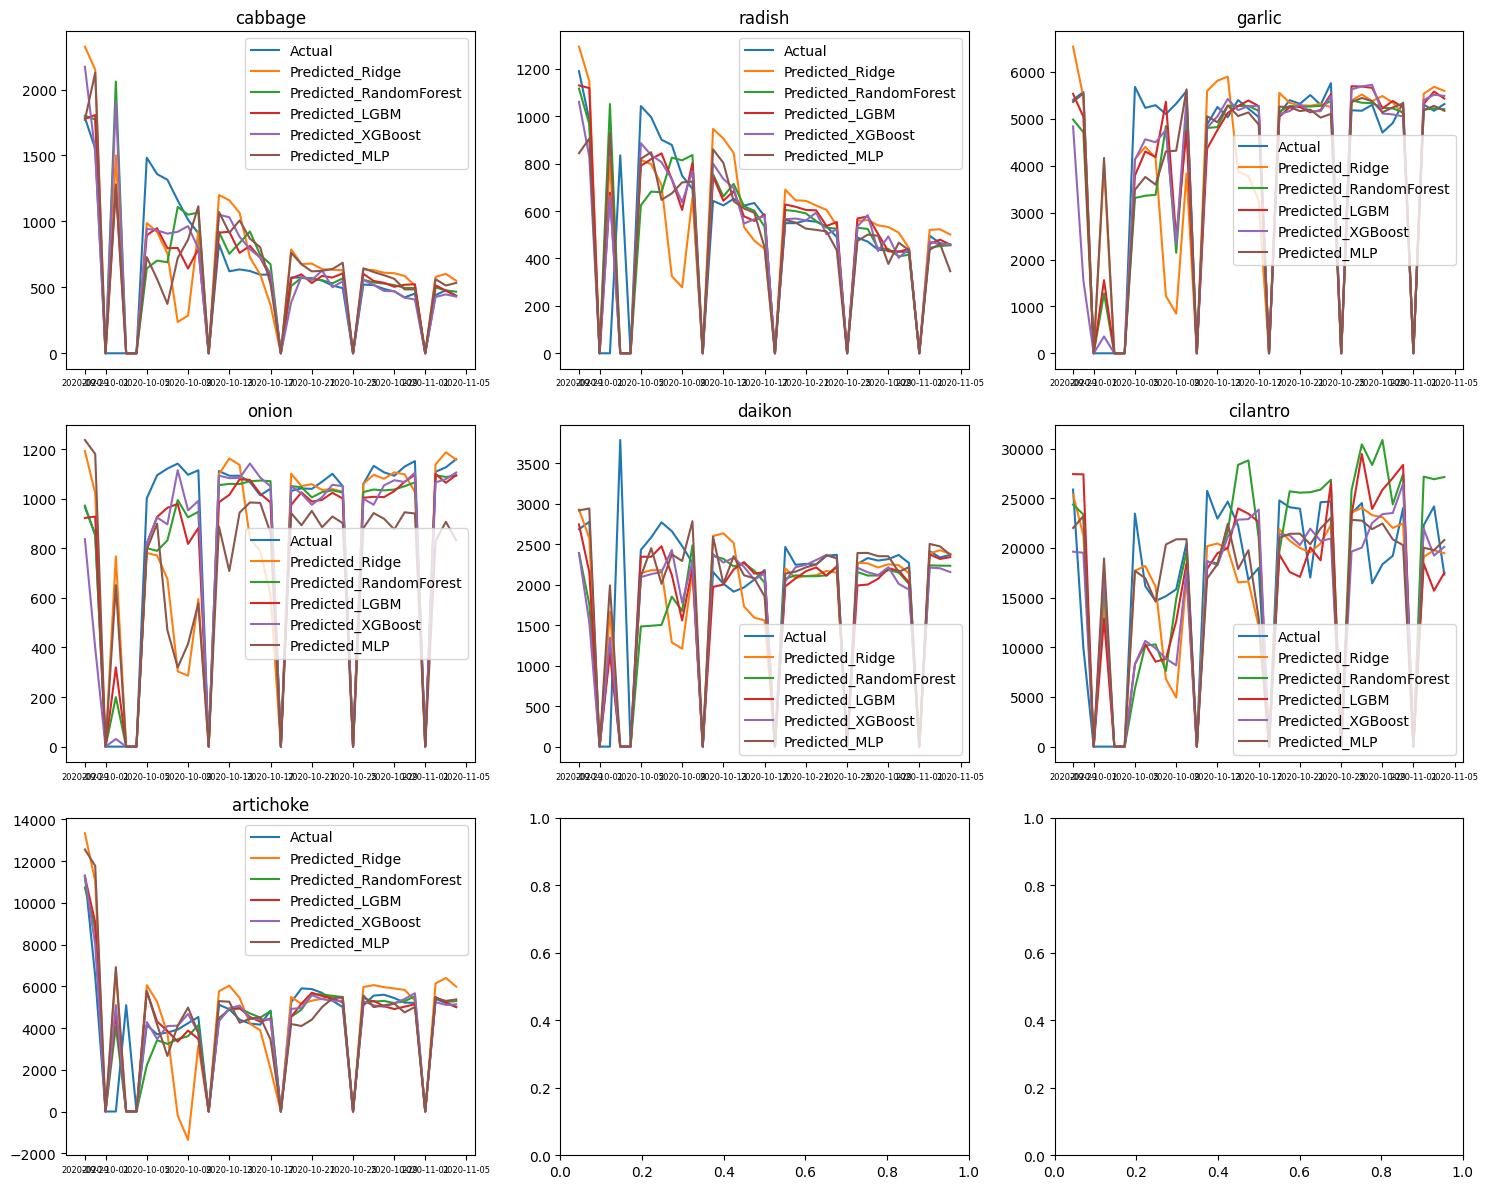

In [107]:
plot_predictions(test_data_predictions_post, targets, models)

In [108]:
def plot_mdape_compare(metrics_post):
    products = metrics_post['product'].unique()
    num_products = len(products)

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharex=False, sharey=True)

    for i, product in enumerate(products):
        row = i // 3
        col = i % 3
        product_data = metrics_post[metrics_post['product'] == product]

        ax = axes[row, col]

        ax.bar(product_data['model'], product_data['MdAPE'])
        ax.set_title(product)
        ax.set_ylabel('MdAPE')
        ax.tick_params(axis='x', labelrotation=45)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

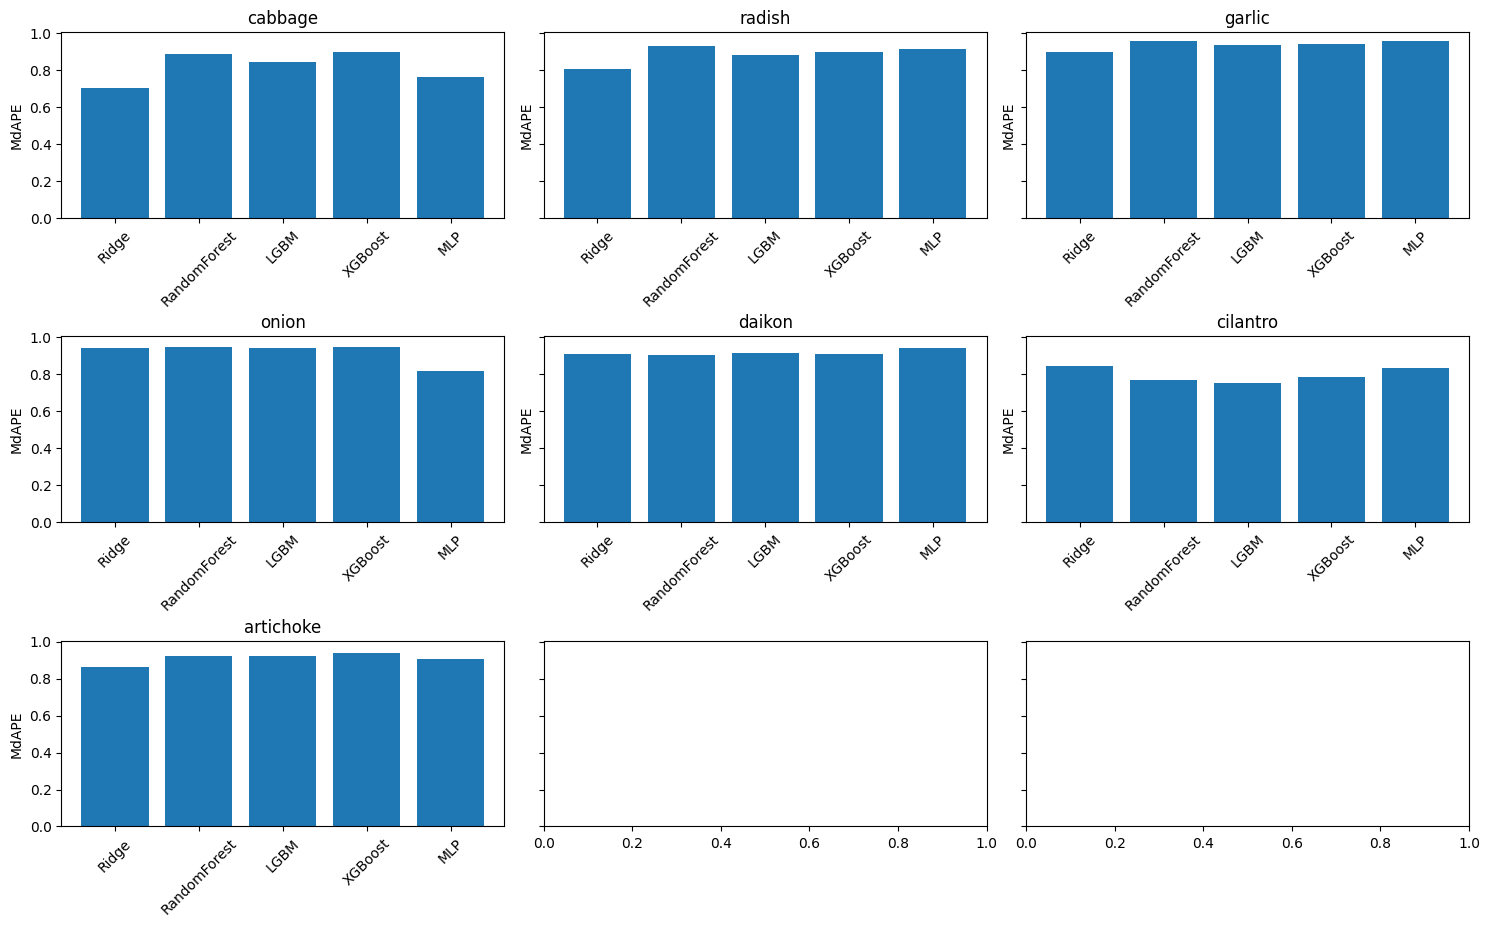

In [109]:
plot_mdape_compare(metrics_post)

In [110]:
metrics_post.pivot(index='product', columns='model', values='MdAPE').round(5)

model         LGBM      MLP  RandomForest    Ridge  XGBoost
product                                                    
artichoke  0.92451  0.90387       0.92417  0.86274  0.93962
cabbage    0.84326  0.75987       0.88731  0.70202  0.89758
cilantro   0.75246  0.83375       0.76986  0.84229  0.78540
daikon     0.91438  0.94062       0.90512  0.90886  0.91011
garlic     0.93251  0.95713       0.95727  0.89710  0.94075
onion      0.94393  0.81918       0.94899  0.94004  0.94856
radish     0.88048  0.91225       0.92765  0.80715  0.89488

In [111]:
metrics.pivot(index='product', columns='model', values='MdAPE').round(5)

model         LGBM      MLP  RandomForest    Ridge  XGBoost
product                                                    
artichoke  0.90341  0.88089       0.91692  0.82052  0.91780
cabbage    0.80280  0.67458       0.86866  0.66618  0.79485
cilantro   0.69467  0.80266       0.72554  0.81766  0.72490
daikon     0.89526  0.92388       0.89410  0.88230  0.87119
garlic     0.90485  0.94345       0.95166  0.83455  0.92276
onion      0.92952  0.79799       0.94245  0.80714  0.93836
radish     0.86280  0.87956       0.92334  0.78840  0.89142

### Feature Importance Check

In [112]:
#!pip install shap

In [113]:
import shap

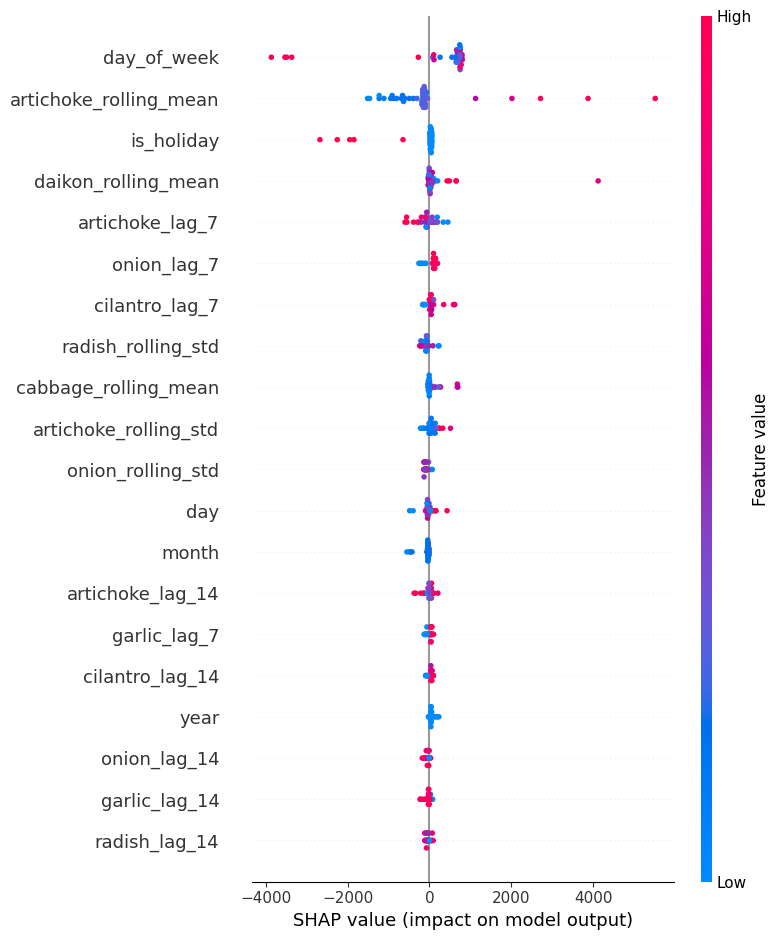

In [114]:
target = 'artichoke'
model = XGBRegressor().fit(train_data[features], train_data[target])
explainer = shap.TreeExplainer(model, train_data[features])
shap_values = explainer(test_data[features])
shap.summary_plot(shap_values, test_data[features], title=f"SHAP Summary Plot for {target}")

## 모델 성능 고도화

### 앙상블 모델

#### Average Model
- **설명**: 여러 모델의 예측값을 가중평균하여 예측하는 방식
  - **Reduced Variance**: 여러 모델의 예측값을 평균내면 개별 모델의 편향이나 분산을 줄여 더 견고한 예측을 만들 수 있음
  - **Simplicity**: 구현이 간단하여 앙상블 학습의 시작점으로 적합함

#### Stacking Model
- **설명**: 여러 모델의 예측값을 새로운 피처로 사용하여 재예측을 수행
  - **Improved Performance**: 단순 평균보다 성능을 개선할 수 있으며, 다양한 모델의 장점을 효과적으로 결합하여 예측 성능을 향상시킬 수 있음
  - **Model Integration**: 기본 모델의 예측 간 관계를 명시적으로 모델링하여 더 나은 일반화를 가능하게 함

#### Voting Regressor (Average)


In [115]:
# 하이브리드용 모델 선언: 성능 높은 모델 위주
models = {
    'RandomForest': RandomForestRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor()
}

In [116]:
models

{'RandomForest': RandomForestRegressor(),
 'LGBM': LGBMRegressor(),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}

In [117]:
def train_models_avg(train_data, test_data, targets, features, models):
    """
    여러 모델을 학습시키고, 예측값을 평균하여 반환하는 함수
    Args:
        train_data (pd.DataFrame): 학습 데이터셋
        test_data (pd.DataFrame): 테스트 데이터셋
        targets (list of str): 타겟 변수 리스트
        features (list of str): 피처 변수 리스트
        models (dict): 모델의 이름과 객체로 구성된 딕셔너리
    Returns:
        dict: 타겟 변수별 예측값의 평균을 포함하는 딕셔너리
    """
    # 모델별 예측값 저장을 위한 딕셔너리 초기화
    predictions = {model_name: {} for model_name in models}

    # 모델 학습 및 예측
    for model_name, model in models.items():
        for target in targets:
            model.fit(train_data[features], train_data[target])
            predictions[model_name][target] = model.predict(test_data[features])

    # 타겟 변수별 예측값 평균 계산
    average_predictions = {}
    for target in targets:
        # 모델별 예측값을 배열로 변환
        all_model_preds = np.array([predictions[model_name][target] for model_name in models])
        # 모델별 예측값의 평균 계산
        average_predictions[target] = np.mean(all_model_preds, axis=0)

    return average_predictions

In [118]:
average_predictions = train_models_avg(train_data, test_data, targets, features, models)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 492.411867
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train s

In [119]:
average_predictions['cabbage'].astype(int)

array([1915, 1717, 1631, 1850, 1601,  472,  822,  845,  787,  942,  875,
        878,    8,  972,  878,  811,  822,  729,  615,    2,  487,  589,
        540,  586,  542,  570,   -1,  569,  533,  509,  495,  480,  476,
         -9,  479,  467,  440])

In [120]:
def create_predictions_df_avg(test_data, predictions, targets):
    """
    테스트 데이터셋에 대한 예측값을 포함하는 데이터프레임을 생성하는 함수
    Args:
        test_data (pd.DataFrame): 테스트 데이터셋
        predictions (dict): 타겟별 평균 예측값을 담은 딕셔너리
        targets (list of str): 타겟 변수 리스트
    Returns:
        pd.DataFrame: 예측값이 추가된 테스트 데이터프레임
    """
    # 예측값을 포함할 새로운 데이터프레임 생성
    test_data_predictions = test_data.copy()

    # 각 타겟에 대해 예측값을 데이터프레임에 추가
    for target in targets:
        test_data_predictions[f'{target}_pred_average'] = predictions[target]

    return test_data_predictions

In [121]:
# 테스트 데이터프레임 생성
test_data_predictions_avg = create_predictions_df_avg(test_data, average_predictions, targets)

In [122]:
test_data_predictions_avg.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke  \
1733 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0   
1734 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0   
1735 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1736 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1737 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0   

      year  month  ...  cilantro_rolling_std  artichoke_rolling_mean  \
1733  2020      9  ...           2025.475335            10881.428571   
1734  2020      9  ...           5143.887528            10384.142857   
1735  2020     10  ...           9419.550379             8951.571429   
1736  2020     10  ...          11200.008091             7391.428571   
1737  2020     10  ...          11788.771041             6603.428571   

      artichoke_rolling_std  cabbage_pred_average  radish_pred_average  \
1733             778.741904           1915.155280          1091.941971   
1734            1846.655303           1717.609878           975.190883   
1735            4355.046378           1631.786004           909.797375   
1736            5369.857784           1850.056757           760.911157   
1737            5222.031848           1601.260695           722.531112   

      garlic_pred_average  onion_pred_average  daikon_pred_average  \
1733          5116.180872          916.989042          2493.739123   
1734          3791.079045          756.023673          1916.122296   
1735          3550.378278          756.280917          1417.291935   
1736          1226.555897          200.553831          1272.569173   
1737           635.025712          236.518865          1067.565968   

      cilantro_pred_average  artichoke_pred_average  
1733           25221.195421            11117.549204  
1734           25349.692955             8801.066419  
1735           19569.488260             6632.508757  
1736           14745.893332             4491.087055  
1737            5483.639414             3526.815689  

[5 rows x 49 columns]

In [123]:
# 후처리 함수 적용된 최종 데이터프레임 생성
test_data_predictions_post_avg = apply_post_processing(test_data_predictions_avg, targets)

In [124]:
test_data_predictions_post_avg.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke  \
1733 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0   
1734 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0   
1735 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1736 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1737 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0   

      year  month  ...  artichoke_rolling_std  cabbage_pred_average  \
1733  2020      9  ...             778.741904           1915.155280   
1734  2020      9  ...            1846.655303           1717.609878   
1735  2020     10  ...            4355.046378              0.000000   
1736  2020     10  ...            5369.857784           1850.056757   
1737  2020     10  ...            5222.031848              0.000000   

      radish_pred_average  garlic_pred_average  onion_pred_average  \
1733          1091.941971          5116.180872          916.989042   
1734           975.190883          3791.079045          756.023673   
1735             0.000000             0.000000            0.000000   
1736           760.911157          1226.555897          200.553831   
1737             0.000000             0.000000            0.000000   

      daikon_pred_average  cilantro_pred_average  artichoke_pred_average  \
1733          2493.739123           25221.195421            11117.549204   
1734          1916.122296           25349.692955             8801.066419   
1735             0.000000               0.000000                0.000000   
1736          1272.569173           14745.893332             4491.087055   
1737             0.000000               0.000000                0.000000   

      holiday  is_flag  
1733        0        0  
1734        0        0  
1735        1        1  
1736        0        0  
1737        1        1  

[5 rows x 51 columns]

In [125]:
test_data_predictions_post.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke  \
1733 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0   
1734 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0   
1735 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1736 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1737 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0   

      year  month  ...  cilantro_APE_Ridge  cilantro_APE_RandomForest  \
1733  2020      9  ...            0.019813                   0.058754   
1734  2020      9  ...            1.140874                   1.353390   
1735  2020     10  ...                 NaN                        NaN   
1736  2020     10  ...                 inf                        inf   
1737  2020     10  ...                 NaN                        NaN   

      cilantro_APE_LGBM  cilantro_APE_XGBoost  cilantro_APE_MLP  \
1733           0.060012              0.241681          0.149385   
1734           1.760025              0.965027          1.337323   
1735                NaN                   NaN               NaN   
1736                inf                   inf               inf   
1737                NaN                   NaN               NaN   

      artichoke_APE_Ridge  artichoke_APE_RandomForest  artichoke_APE_LGBM  \
1733             0.179480                    0.050381            0.004597   
1734             0.704137                    0.349333            0.398555   
1735                  NaN                         NaN                 NaN   
1736                  inf                         inf                 inf   
1737             1.000000                    1.000000            1.000000   

      artichoke_APE_XGBoost  artichoke_APE_MLP  
1733               0.003051           0.110890  
1734               0.234738           0.816411  
1735                    NaN                NaN  
1736                    inf                inf  
1737               1.000000           1.000000  

[5 rows x 114 columns]

In [126]:
# get metrics
metrics_post_avg = evaluate_predictions(test_data_predictions_post_avg, targets)
metrics_post_avg[['product', 'model']] = metrics_post_avg['product_model'].str.split('_', expand=True)

In [127]:
metrics_post_avg

product_model     MdAPE    product    model
0    cabbage_average  0.899609    cabbage  average
1     radish_average  0.914049     radish  average
2     garlic_average  0.947457     garlic  average
3      onion_average  0.943413      onion  average
4     daikon_average  0.922324     daikon  average
5   cilantro_average  0.786981   cilantro  average
6  artichoke_average  0.944884  artichoke  average

In [128]:
metrics_post.head()

product_model     MdAPE  product         model
0         cabbage_Ridge  0.702017  cabbage         Ridge
1  cabbage_RandomForest  0.887306  cabbage  RandomForest
2          cabbage_LGBM  0.843261  cabbage          LGBM
3       cabbage_XGBoost  0.897584  cabbage       XGBoost
4           cabbage_MLP  0.759871  cabbage           MLP

In [129]:
pd.concat([metrics_post, metrics_post_avg])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)

model         LGBM      MLP  RandomForest    Ridge  XGBoost  average
product                                                             
artichoke  0.92451  0.90387       0.92417  0.86274  0.93962  0.94488
cabbage    0.84326  0.75987       0.88731  0.70202  0.89758  0.89961
cilantro   0.75246  0.83375       0.76986  0.84229  0.78540  0.78698
daikon     0.91438  0.94062       0.90512  0.90886  0.91011  0.92232
garlic     0.93251  0.95713       0.95727  0.89710  0.94075  0.94746
onion      0.94393  0.81918       0.94899  0.94004  0.94856  0.94341
radish     0.88048  0.91225       0.92765  0.80715  0.89488  0.91405

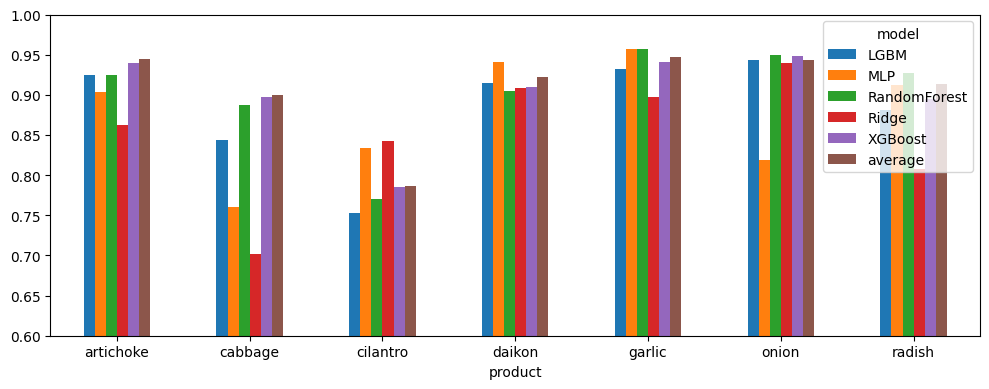

In [130]:
pd.concat([metrics_post, metrics_post_avg])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)\
  .plot(kind='bar', figsize=(10, 4), rot=0)

plt.ylim(0.6, 1)
plt.tight_layout()

In [131]:
from sklearn.ensemble import StackingRegressor

In [132]:
prediction_stack = {}
base_regressors = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]

stacking_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=XGBRegressor()
)

stacking_regressor

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('lgbm', LGBMRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gam...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

In [133]:
for target in targets:
    stacking_regressor.fit(train_data[features], train_data[target])
    prediction_stack[target] = stacking_regressor.predict(test_data[features])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 34
[LightGBM] [Info] Start training from score 599.280396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1375, number of used features: 34
[LightGBM] [Info] Start training from score 569.157091
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7202
[LightGBM] [Info] Number of data points in the train set: 1375, number of used features: 34
[LightGBM] [Info] Start tr

In [134]:
prediction_stack['cabbage'].astype(int)

array([1577, 1547,  977, 1584, 1558,  540,  538,  817,  563,  751,  806,
        411,    0,  772,  859,  842,  730,  743,  588,    0,  522,  571,
        559,  583,  516,  532,    0,  530,  498,  483,  513,  494,  482,
          0,  507,  477,  437])

In [135]:
def create_predictions_df_stack(test_data, predictions, targets):
    """
    stack 예측용 테스트 데이터셋에 대한 예측값을 포함하는 데이터프레임을 생성하는 함수
    Args:
        test_data (pd.DataFrame): 테스트 데이터셋
        predictions (dict): 타겟별 평균 예측값을 담은 딕셔너리
        targets (list of str): 타겟 변수 리스트
    Returns:
        pd.DataFrame: 예측값이 추가된 테스트 데이터프레임
    """
    # 예측값을 포함할 새로운 데이터프레임 생성
    test_data_predictions = test_data.copy()

    # 각 타겟에 대해 예측값을 데이터프레임에 추가
    for target in targets:
        test_data_predictions[f'{target}_pred_stack'] = predictions[target]

    return test_data_predictions

In [136]:
test_data_predictions_stack = create_predictions_df_stack(test_data, prediction_stack, targets)

# post-processing
test_data_predictions_post_stack = apply_post_processing(test_data_predictions_stack, targets)

In [137]:
test_data_predictions_post_stack.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke  \
1733 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0   
1734 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0   
1735 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1736 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1737 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0   

      year  month  ...  artichoke_rolling_std  cabbage_pred_stack  \
1733  2020      9  ...             778.741904         1577.642212   
1734  2020      9  ...            1846.655303         1547.950928   
1735  2020     10  ...            4355.046378            0.000000   
1736  2020     10  ...            5369.857784         1584.639893   
1737  2020     10  ...            5222.031848            0.000000   

      radish_pred_stack  garlic_pred_stack  onion_pred_stack  \
1733        1055.127197        5162.010742       1060.986938   
1734        1078.751587        4275.458984       1105.788940   
1735           0.000000           0.000000          0.000000   
1736         967.955261           2.730137        -17.973873   
1737           0.000000           0.000000          0.000000   

      daikon_pred_stack  cilantro_pred_stack  artichoke_pred_stack  holiday  \
1733        2190.569580         31206.882812           7804.586914        0   
1734        1708.415894         31592.390625           9785.332031        0   
1735           0.000000             0.000000              0.000000        1   
1736        1533.314697         19287.142578           3681.718262        0   
1737           0.000000             0.000000              0.000000        1   

      is_flag  
1733        0  
1734        0  
1735        1  
1736        0  
1737        1  

[5 rows x 51 columns]

In [138]:
# get metrics
metrics_post_stack = evaluate_predictions(test_data_predictions_post_stack, targets)
metrics_post_stack[['product', 'model']] = metrics_post_stack['product_model'].str.split('_', expand=True)
metrics_post_stack

product_model     MdAPE    product  model
0    cabbage_stack  0.906148    cabbage  stack
1     radish_stack  0.892248     radish  stack
2     garlic_stack  0.950768     garlic  stack
3      onion_stack  0.941105      onion  stack
4     daikon_stack  0.881155     daikon  stack
5   cilantro_stack  0.724400   cilantro  stack
6  artichoke_stack  0.923352  artichoke  stack

In [139]:
pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)

model         LGBM      MLP  RandomForest    Ridge  XGBoost  average    stack
product                                                                      
artichoke  0.92451  0.90387       0.92417  0.86274  0.93962  0.94488  0.92335
cabbage    0.84326  0.75987       0.88731  0.70202  0.89758  0.89961  0.90615
cilantro   0.75246  0.83375       0.76986  0.84229  0.78540  0.78698  0.72440
daikon     0.91438  0.94062       0.90512  0.90886  0.91011  0.92232  0.88116
garlic     0.93251  0.95713       0.95727  0.89710  0.94075  0.94746  0.95077
onion      0.94393  0.81918       0.94899  0.94004  0.94856  0.94341  0.94110
radish     0.88048  0.91225       0.92765  0.80715  0.89488  0.91405  0.89225

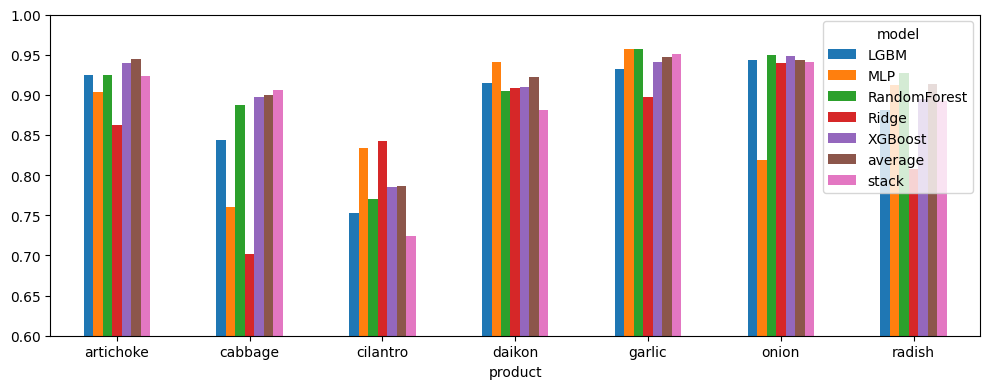

In [140]:
pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5)\
  .plot(kind='bar', figsize=(10,4), rot=0)

plt.ylim(0.6, 1)
plt.tight_layout()

### Deep Learning with Pytorch
- MLP Regressor 보다 복잡한 구조 테스트
- Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN),
- Long Short-Term Memory Networks (LSTM), Gated Recurrent Unit (GRU), Transformer Models

In [141]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features and targets setup
target_columns = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
features = [col for col in train_data.columns if col not in ['date'] + target_columns]

# Normalize feature columns
scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])

# Dataset class definition
class MyDataset(Dataset):
    def __init__(self, data, target_columns, feature_columns):
        self.features = torch.tensor(data[feature_columns].values, dtype=torch.float32)
        self.targets = torch.tensor(data[target_columns].values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create train and test datasets
train_dataset = MyDataset(train_data, target_columns, features)
test_dataset = MyDataset(test_data, target_columns, features)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Improved FCNN Model definition
class ImprovedFCNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.2):
        super(ImprovedFCNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate model, criterion, optimizer
input_dim = len(features)
hidden_dim = 128
output_dim = len(target_columns)
dropout_rate = 0.3
model = ImprovedFCNNModel(input_dim, hidden_dim, output_dim, dropout_rate)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
early_stopping_patience = 10
best_loss = float('inf')
epochs_no_improve = 0

# Training loop with early stopping
num_epochs = 500  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Evaluation on test set
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            total_loss += criterion(outputs, targets).item()
    avg_loss = total_loss / len(test_loader)

    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_loss:.4f}")

    # Early stopping check
    if avg_loss < best_loss:
        best_loss = avg_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

Epoch 1/500, Test Loss: 57300336.0000
Epoch 2/500, Test Loss: 56949772.0000
Epoch 3/500, Test Loss: 55576952.0000
Epoch 4/500, Test Loss: 52186348.0000
Epoch 5/500, Test Loss: 46930944.0000
Epoch 6/500, Test Loss: 40738968.0000
Epoch 7/500, Test Loss: 35483876.0000
Epoch 8/500, Test Loss: 32903520.0000
Epoch 9/500, Test Loss: 32343524.0000
Epoch 10/500, Test Loss: 31643128.0000
Epoch 11/500, Test Loss: 29909454.0000
Epoch 12/500, Test Loss: 28260744.0000
Epoch 13/500, Test Loss: 26903162.0000
Epoch 14/500, Test Loss: 25406018.0000
Epoch 15/500, Test Loss: 23862048.0000
Epoch 16/500, Test Loss: 22692932.0000
Epoch 17/500, Test Loss: 21866000.0000
Epoch 18/500, Test Loss: 21383536.0000
Epoch 19/500, Test Loss: 20519132.0000
Epoch 20/500, Test Loss: 20097326.0000
Epoch 21/500, Test Loss: 19597768.0000
Epoch 22/500, Test Loss: 19475878.0000
Epoch 23/500, Test Loss: 18909998.0000
Epoch 24/500, Test Loss: 18826196.0000
Epoch 25/500, Test Loss: 18800264.0000
Epoch 26/500, Test Loss: 18525312.

<All keys matched successfully>

In [142]:
# Generate predictions
model.eval()
predictions = {target: [] for target in target_columns}
real_values = {target: [] for target in target_columns}

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        for i, target in enumerate(target_columns):
            predictions[target].extend(outputs[:, i].numpy())
            real_values[target].extend(targets[:, i].numpy())

# Convert predictions and real values into DataFrames for easier plotting
pred_df = pd.DataFrame(predictions)
real_df = pd.DataFrame(real_values)
date_series = test_data['date'].reset_index(drop=True)

# Add date to the DataFrames
pred_df['date'] = date_series
real_df['date'] = date_series

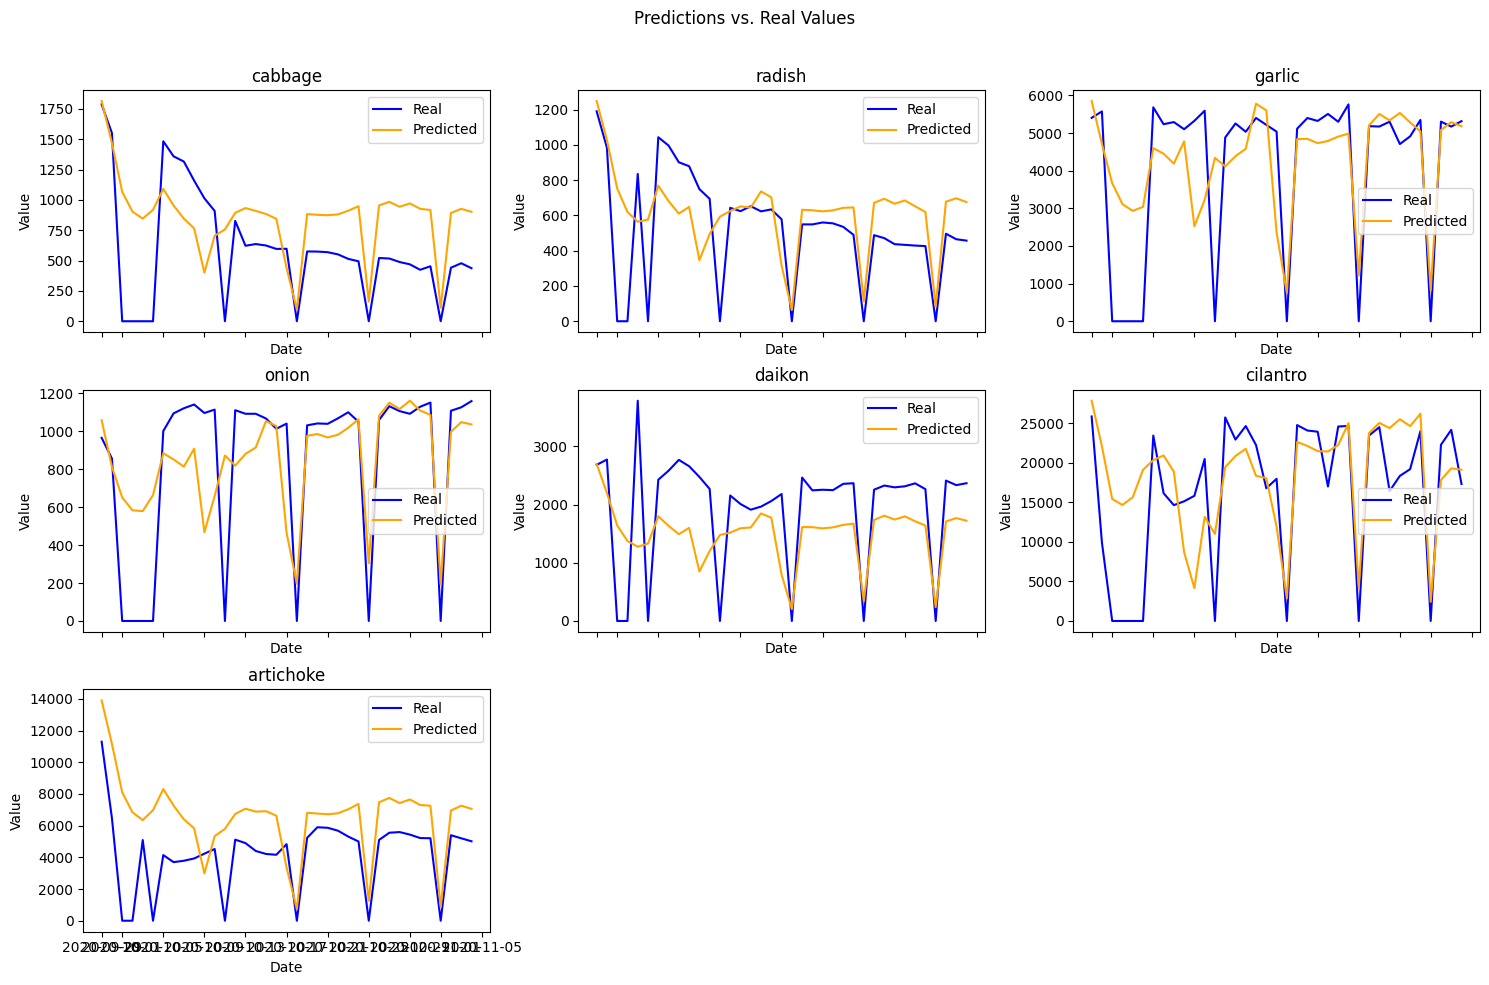

In [143]:
# Plot predictions vs. real values
def plot_predictions_vs_real(pred_df, real_df, targets):
    num_products = len(targets)
    num_cols = 3
    num_rows = (num_products + num_cols - 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)
    axes = axes.flatten()

    for i, target in enumerate(targets):
        ax = axes[i]
        ax.plot(real_df['date'], real_df[target], label='Real', color='blue')
        ax.plot(pred_df['date'], pred_df[target], label='Predicted', color='orange')
        ax.set_title(target)
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle("Predictions vs. Real Values")
    plt.show()

plot_predictions_vs_real(pred_df, real_df, target_columns)

In [144]:
data.head()

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
0 2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
1 2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0   
2 2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
3 2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0   
4 2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0   

   year  month  ...  garlic_rolling_mean  garlic_rolling_std  \
0  2016      1  ...                  NaN                 NaN   
1  2016      1  ...                  NaN                 NaN   
2  2016      1  ...                  NaN                 NaN   
3  2016      1  ...                  NaN                 NaN   
4  2016      1  ...                  NaN                 NaN   

   onion_rolling_mean  onion_rolling_std  daikon_rolling_mean  \
0                 NaN                NaN                  NaN   
1                 NaN                NaN                  NaN   
2                 NaN                NaN                  NaN   
3                 NaN                NaN                  NaN   
4                 NaN                NaN                  NaN   

   daikon_rolling_std  cilantro_rolling_mean  cilantro_rolling_std  \
0                 NaN                    NaN                   NaN   
1                 NaN                    NaN                   NaN   
2                 NaN                    NaN                   NaN   
3                 NaN                    NaN                   NaN   
4                 NaN                    NaN                   NaN   

   artichoke_rolling_mean  artichoke_rolling_std  
0                     NaN                    NaN  
1                     NaN                    NaN  
2                     NaN                    NaN  
3                     NaN                    NaN  
4                     NaN                    NaN  

[5 rows x 42 columns]

In [145]:
targets = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

In [146]:
real = data.set_index('date')[targets].reset_index()
real

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke
0    2016-01-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1    2016-01-02    329.0   360.0  5475.0  1281.0  1704.0   11000.0    13242.0
2    2016-01-03      0.0     0.0     0.0     0.0     0.0       0.0        0.0
3    2016-01-04    478.0   382.0  5210.0  1235.0  1716.0    4464.0     9923.0
4    2016-01-05    442.0   422.0  5387.0  1213.0  1715.0    4342.0     9529.0
...         ...      ...     ...     ...     ...     ...       ...        ...
1765 2020-10-31    453.0   426.0  5348.0  1152.0  2265.0   24013.0     5204.0
1766 2020-11-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0
1767 2020-11-02    441.0   496.0  5303.0  1109.0  2412.0   22287.0     5395.0
1768 2020-11-03    478.0   465.0  5172.0  1127.0  2334.0   24178.0     5201.0
1769 2020-11-04    437.0   457.0  5316.0  1160.0  2367.0   17324.0     5013.0

[1770 rows x 8 columns]

In [147]:
test_data_predictions_post.head()

date  cabbage  radish  garlic  onion  daikon  cilantro  artichoke  \
1733 2020-09-29   1787.0  1190.0  5404.0  966.0  2682.0   25873.0    11298.0   
1734 2020-09-30   1551.0   984.0  5575.0  857.0  2774.0    9929.0     6476.0   
1735 2020-10-01      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1736 2020-10-02      0.0     0.0     0.0    0.0     0.0       0.0        0.0   
1737 2020-10-03      0.0   835.0     0.0    0.0  3784.0       0.0     5091.0   

      year  month  ...  cilantro_APE_Ridge  cilantro_APE_RandomForest  \
1733  2020      9  ...            0.019813                   0.058754   
1734  2020      9  ...            1.140874                   1.353390   
1735  2020     10  ...                 NaN                        NaN   
1736  2020     10  ...                 inf                        inf   
1737  2020     10  ...                 NaN                        NaN   

      cilantro_APE_LGBM  cilantro_APE_XGBoost  cilantro_APE_MLP  \
1733           0.060012              0.241681          0.149385   
1734           1.760025              0.965027          1.337323   
1735                NaN                   NaN               NaN   
1736                inf                   inf               inf   
1737                NaN                   NaN               NaN   

      artichoke_APE_Ridge  artichoke_APE_RandomForest  artichoke_APE_LGBM  \
1733             0.179480                    0.050381            0.004597   
1734             0.704137                    0.349333            0.398555   
1735                  NaN                         NaN                 NaN   
1736                  inf                         inf                 inf   
1737             1.000000                    1.000000            1.000000   

      artichoke_APE_XGBoost  artichoke_APE_MLP  
1733               0.003051           0.110890  
1734               0.234738           0.816411  
1735                    NaN                NaN  
1736                    inf                inf  
1737               1.000000           1.000000  

[5 rows x 114 columns]

In [148]:
pred_cols = [col for col in test_data_predictions_post.columns if 'pred' in col or 'date' in col]
pred_cols_avg = [col for col in test_data_predictions_post_avg.columns if 'pred' in col or 'date' in col]
pred_cols_stack = [col for col in test_data_predictions_post_stack.columns if 'pred' in col or 'date' in col]

In [149]:
pred_cols_avg

['date',
 'cabbage_pred_average',
 'radish_pred_average',
 'garlic_pred_average',
 'onion_pred_average',
 'daikon_pred_average',
 'cilantro_pred_average',
 'artichoke_pred_average']

In [150]:
pred = test_data_predictions_post[pred_cols]
pred_avg = test_data_predictions_post_avg[pred_cols_avg]
pred_stack = test_data_predictions_post_stack[pred_cols_stack]

In [151]:
pred_avg.head()

date  cabbage_pred_average  radish_pred_average  \
1733 2020-09-29           1915.155280          1091.941971   
1734 2020-09-30           1717.609878           975.190883   
1735 2020-10-01              0.000000             0.000000   
1736 2020-10-02           1850.056757           760.911157   
1737 2020-10-03              0.000000             0.000000   

      garlic_pred_average  onion_pred_average  daikon_pred_average  \
1733          5116.180872          916.989042          2493.739123   
1734          3791.079045          756.023673          1916.122296   
1735             0.000000            0.000000             0.000000   
1736          1226.555897          200.553831          1272.569173   
1737             0.000000            0.000000             0.000000   

      cilantro_pred_average  artichoke_pred_average  
1733           25221.195421            11117.549204  
1734           25349.692955             8801.066419  
1735               0.000000                0.000000  
1736           14745.893332             4491.087055  
1737               0.000000                0.000000

In [152]:
real = real.merge(pred, on='date', how='left')\
           .merge(pred_avg, on='date', how='left')\
           .merge(pred_stack, on='date', how='left')

In [153]:
real.tail()

date  cabbage  radish  garlic   onion  daikon  cilantro  artichoke  \
1765 2020-10-31    453.0   426.0  5348.0  1152.0  2265.0   24013.0     5204.0   
1766 2020-11-01      0.0     0.0     0.0     0.0     0.0       0.0        0.0   
1767 2020-11-02    441.0   496.0  5303.0  1109.0  2412.0   22287.0     5395.0   
1768 2020-11-03    478.0   465.0  5172.0  1127.0  2334.0   24178.0     5201.0   
1769 2020-11-04    437.0   457.0  5316.0  1160.0  2367.0   17324.0     5013.0   

      cabbage_pred_Ridge  radish_pred_Ridge  ...  daikon_pred_average  \
1765          513.722689         443.535349  ...          2021.010395   
1766            0.000000           0.000000  ...             0.000000   
1767          579.208919         520.568444  ...          2289.590858   
1768          602.498615         523.190346  ...          2276.395199   
1769          550.397299         501.105125  ...          2271.831277   

      cilantro_pred_average  artichoke_pred_average  cabbage_pred_stack  \
1765           29315.838100             5381.572552          482.082245   
1766               0.000000                0.000000            0.000000   
1767           21160.084072             5372.581295          507.295563   
1768           19216.530092             5182.752302          477.301941   
1769           20026.210981             5098.086042          437.734375   

      radish_pred_stack  garlic_pred_stack  onion_pred_stack  \
1765         435.836700        5117.765137       1132.898071   
1766           0.000000           0.000000          0.000000   
1767         449.814758        5143.944336       1106.874023   
1768         530.950134        5438.710449        998.149414   
1769         436.163330        5428.699219       1112.089233   

      daikon_pred_stack  cilantro_pred_stack  artichoke_pred_stack  
1765        1995.815308         18488.087891           5640.291504  
1766           0.000000             0.000000              0.000000  
1767        2058.502686         15191.690430           5191.119141  
1768        2163.634521         20016.302734           5203.370117  
1769        2372.333252         18203.164062           5018.116211  

[5 rows x 57 columns]

In [154]:
real.columns

Index(['date', 'cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro',
       'artichoke', 'cabbage_pred_Ridge', 'radish_pred_Ridge',
       'garlic_pred_Ridge', 'onion_pred_Ridge', 'daikon_pred_Ridge',
       'cilantro_pred_Ridge', 'artichoke_pred_Ridge',
       'cabbage_pred_RandomForest', 'radish_pred_RandomForest',
       'garlic_pred_RandomForest', 'onion_pred_RandomForest',
       'daikon_pred_RandomForest', 'cilantro_pred_RandomForest',
       'artichoke_pred_RandomForest', 'cabbage_pred_LGBM', 'radish_pred_LGBM',
       'garlic_pred_LGBM', 'onion_pred_LGBM', 'daikon_pred_LGBM',
       'cilantro_pred_LGBM', 'artichoke_pred_LGBM', 'cabbage_pred_XGBoost',
       'radish_pred_XGBoost', 'garlic_pred_XGBoost', 'onion_pred_XGBoost',
       'daikon_pred_XGBoost', 'cilantro_pred_XGBoost',
       'artichoke_pred_XGBoost', 'cabbage_pred_MLP', 'radish_pred_MLP',
       'garlic_pred_MLP', 'onion_pred_MLP', 'daikon_pred_MLP',
       'cilantro_pred_MLP', 'artichoke_pred_MLP', 'cabbage_p

In [155]:
real.shape

(1770, 57)

<Axes: xlabel='date'>

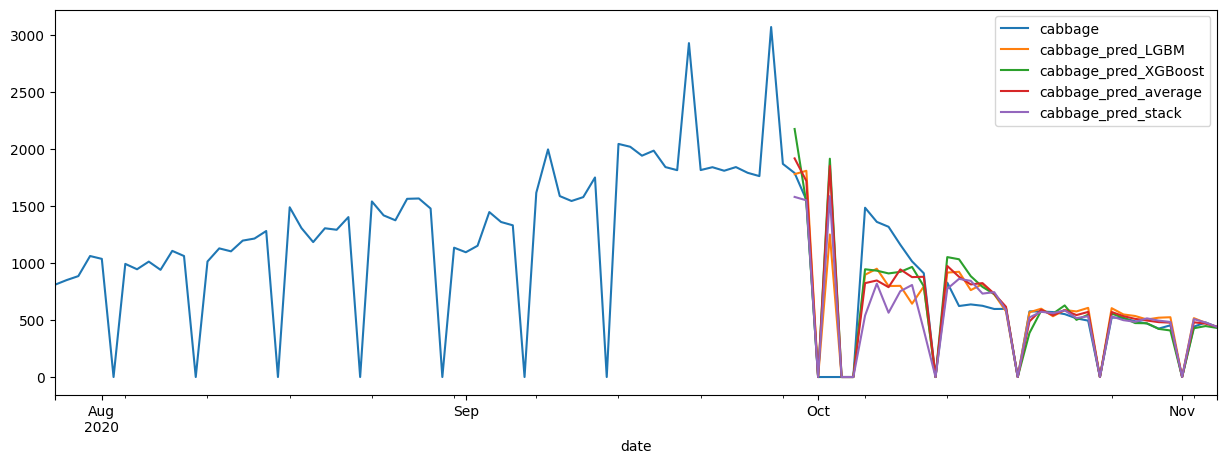

In [156]:
real[['date', 'cabbage', 'cabbage_pred_LGBM', 'cabbage_pred_XGBoost', 'cabbage_pred_average', 'cabbage_pred_stack']][-100:].set_index("date").plot(figsize=(15, 5))

In [157]:
file_path = './streamlit_data.csv' # 저장할 경로 지정

real.to_csv(file_path, index=False)

In [158]:
metric_summay = pd.concat([metrics_post, metrics_post_avg, metrics_post_stack])\
  .pivot(index='product', columns='model', values='MdAPE').round(5).reset_index()

In [159]:
metric_summay

model    product     LGBM      MLP  RandomForest    Ridge  XGBoost  average  \
0      artichoke  0.92451  0.90387       0.92417  0.86274  0.93962  0.94488   
1        cabbage  0.84326  0.75987       0.88731  0.70202  0.89758  0.89961   
2       cilantro  0.75246  0.83375       0.76986  0.84229  0.78540  0.78698   
3         daikon  0.91438  0.94062       0.90512  0.90886  0.91011  0.92232   
4         garlic  0.93251  0.95713       0.95727  0.89710  0.94075  0.94746   
5          onion  0.94393  0.81918       0.94899  0.94004  0.94856  0.94341   
6         radish  0.88048  0.91225       0.92765  0.80715  0.89488  0.91405   

model    stack  
0      0.92335  
1      0.90615  
2      0.72440  
3      0.88116  
4      0.95077  
5      0.94110  
6      0.89225

In [160]:
file_path = './metric_summary.csv' # 저장할 경로 지정

metric_summay.to_csv(file_path, index=False)